# Predicting Caravan Insurance

The project originates from the **CoIL Challenge 2000**, a supervised learning competition to predict who would be interested to purchase a caravan insurance. There are two tasks; predictive and descriptive. We are going to focus only on the predictive task.

The data given resembles the real-life data, noisy, skewed, and imbalanced.

Our main goal for this project is to **optimize insurance sales by analyzing factors leading to the caravan insurance by using predictive models**. To achieve this, we have to **identify potential customers who are more likely to purchase a caravan insurance based on selected predictors**.


## Importing libraries for the project

In [1]:
# Import necessary packages
import numpy as np
import pandas as pd

# Import visualization packages
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Import pre-processing packages
from sklearn.model_selection import train_test_split, cross_val_score, KFold, cross_validate
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.metrics import make_scorer, accuracy_score,classification_report,confusion_matrix, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, average_precision_score, roc_auc_score, precision_recall_curve, roc_curve, auc

import matplotlib.cm as cm

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV
from scipy.stats import chi2_contingency

# Import data balancing packages
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss, TomekLinks, EditedNearestNeighbours
from imblearn.combine import SMOTETomek, SMOTEENN

# Import ML models packages
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
import xgboost

# Import miscellaneous packages
import pickle
import gradio as gr
import warnings

pd.set_option('display.max_column',None)
# pd.set_option('display.max_rows', None)
warnings.filterwarnings("ignore")

## Data Understanding

### Checking the structure of the dataset

In [2]:
# Read and display the data
df = pd.read_csv('caravan-insurance-challenge-dataset.csv')
# Move the label column for clarity
label_col = df.pop('CARAVAN')
df.insert(0, 'CARAVAN', label_col)

df.head(10)

CARAVAN ORIGIN  MOSTYPE  MAANTHUI  MGEMOMV  MGEMLEEF  MOSHOOFD  MGODRK  \
0        0  train       33         1        3         2         8       0   
1        0  train       37         1        2         2         8       1   
2        0  train       37         1        2         2         8       0   
3        0  train        9         1        3         3         3       2   
4        0  train       40         1        4         2        10       1   
5        0  train       23         1        2         1         5       0   
6        0  train       39         2        3         2         9       2   
7        0  train       33         1        2         3         8       0   
8        0  train       33         1        2         4         8       0   
9        0  train       11         2        3         3         3       3   

   MGODPR  MGODOV  MGODGE  MRELGE  MRELSA  MRELOV  MFALLEEN  MFGEKIND  \
0       5       1       3       7       0       2         1         2   
1       4       1       4       6       2       2         0         4   
2       4       2       4       3       2       4         4         4   
3       3       2       4       5       2       2         2         3   
4       4       1       4       7       1       2         2         4   
5       5       0       5       0       6       3         3         5   
6       2       0       5       7       2       0         0         3   
7       7       0       2       7       2       0         0         5   
8       1       3       6       6       0       3         3         3   
9       5       0       2       7       0       2         2         2   

   MFWEKIND  MOPLHOOG  MOPLMIDD  MOPLLAAG  MBERHOOG  MBERZELF  MBERBOER  \
0         6         1         2         7         1         0         1   
1         5         0         5         4         0         0         0   
2         2         0         5         4         0         0         0   
3         4         3         4         2         4         0         0   
4         4         5         4         0         0         5         4   
5         2         0         5         4         2         0         0   
6         6         0         4         5         0         0         0   
7         4         0         3         6         2         0         0   
8         3         0         1         8         1         1         0   
9         6         0         4         5         2         0         0   

   MBERMIDD  MBERARBG  MBERARBO  MSKA  MSKB1  MSKB2  MSKC  MSKD  MHHUUR  \
0         2         5         2     1      1      2     6     1       1   
1         5         0         4     0      2      3     5     0       2   
2         7         0         2     0      5      0     4     0       7   
3         3         1         2     3      2      1     4     0       5   
4         0         0         0     9      0      0     0     0       4   
5         4         2         2     2      2      2     4     2       9   
6         4         1         5     0      1      4     5     0       6   
7         2         5         2     2      1      2     5     2       0   
8         1         8         1     1      1      0     8     1       9   
9         3         3         3     1      2      1     4     2       0   

   MHKOOP  MAUT1  MAUT2  MAUT0  MZFONDS  MZPART  MINKM30  MINK3045  MINK4575  \
0       8      8      0      1        8       1        0         4         5   
1       7      7      1      2        6       3        2         0         5   
2       2      7      0      2        9       0        4         5         0   
3       4      9      0      0        7       2        1         5         3   
4       5      6      2      1        5       4        0         0         9   
5       0      5      3      3        9       0        5         2         3   
6       3      8      0      1        9       0        4         3         3   
7       9      4      4      2        6       3        2   

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9822 entries, 0 to 9821
Data columns (total 87 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   CARAVAN   9822 non-null   int64 
 1   ORIGIN    9822 non-null   object
 2   MOSTYPE   9822 non-null   int64 
 3   MAANTHUI  9822 non-null   int64 
 4   MGEMOMV   9822 non-null   int64 
 5   MGEMLEEF  9822 non-null   int64 
 6   MOSHOOFD  9822 non-null   int64 
 7   MGODRK    9822 non-null   int64 
 8   MGODPR    9822 non-null   int64 
 9   MGODOV    9822 non-null   int64 
 10  MGODGE    9822 non-null   int64 
 11  MRELGE    9822 non-null   int64 
 12  MRELSA    9822 non-null   int64 
 13  MRELOV    9822 non-null   int64 
 14  MFALLEEN  9822 non-null   int64 
 15  MFGEKIND  9822 non-null   int64 
 16  MFWEKIND  9822 non-null   int64 
 17  MOPLHOOG  9822 non-null   int64 
 18  MOPLMIDD  9822 non-null   int64 
 19  MOPLLAAG  9822 non-null   int64 
 20  MBERHOOG  9822 non-null   int64 
 21  MBERZELF  9822


The dataset is made up of 9822 rows and 87 columns. However, they already splitted the dataset to train and test set. On top of that, 85 columns are features, 1 is label, and 1 can be discarded when we do the splitting.
There is no null and nan values, therefore we can skip data imputation.


The column types are numerical and categorical (discrete and ordinal).

In short, the data is splitted into:

        Training set: 5822 rows x 86 columns
        Testing set : 4000 rows x 86 columns

Now, we want to see the correlation of the features to find if there is any strong and concrete predictors.
Let us convert the values to numerical first before analyzing the correlation.

### Data Wrangling

We are removing duplicates to avoid redundancy.

In [5]:
df_train = df.copy()
df_train = df_train[df_train['ORIGIN'] == 'train']
df_train.drop(['ORIGIN'], axis=1, inplace=True)

df_no_duplicates = df_train.drop_duplicates(subset=None)
print('Removed duplicated rows:', df_train.shape[0] - df_no_duplicates.shape[0])
df_train = df_no_duplicates.copy()
print('Remaining rows:', df_train.shape[0])

Removed duplicated rows: 602
Remaining rows: 5220


#### Exploratory Data Analysis

In [6]:
# Define contribution and number of policy columns in a list of tuples

contrib_columns = ['PWAPART', 'PWABEDR', 'PWALAND', 'PPERSAUT', 'PBESAUT', 'PMOTSCO',
       'PVRAAUT', 'PAANHANG', 'PTRACTOR', 'PWERKT', 'PBROM', 'PLEVEN',
       'PPERSONG', 'PGEZONG', 'PWAOREG', 'PBRAND', 'PZEILPL', 'PPLEZIER',
       'PFIETS', 'PINBOED', 'PBYSTAND']

no_pol_columns = ['AWAPART', 'AWABEDR', 'AWALAND',
       'APERSAUT', 'ABESAUT', 'AMOTSCO', 'AVRAAUT', 'AAANHANG', 'ATRACTOR',
       'AWERKT', 'ABROM', 'ALEVEN', 'APERSONG', 'AGEZONG', 'AWAOREG', 'ABRAND',
       'AZEILPL', 'APLEZIER', 'AFIETS', 'AINBOED', 'ABYSTAND']


# Create list of tuples
column_pairs = [(contrib_columns[i], no_pol_columns[i]) for i in range(len(contrib_columns))]

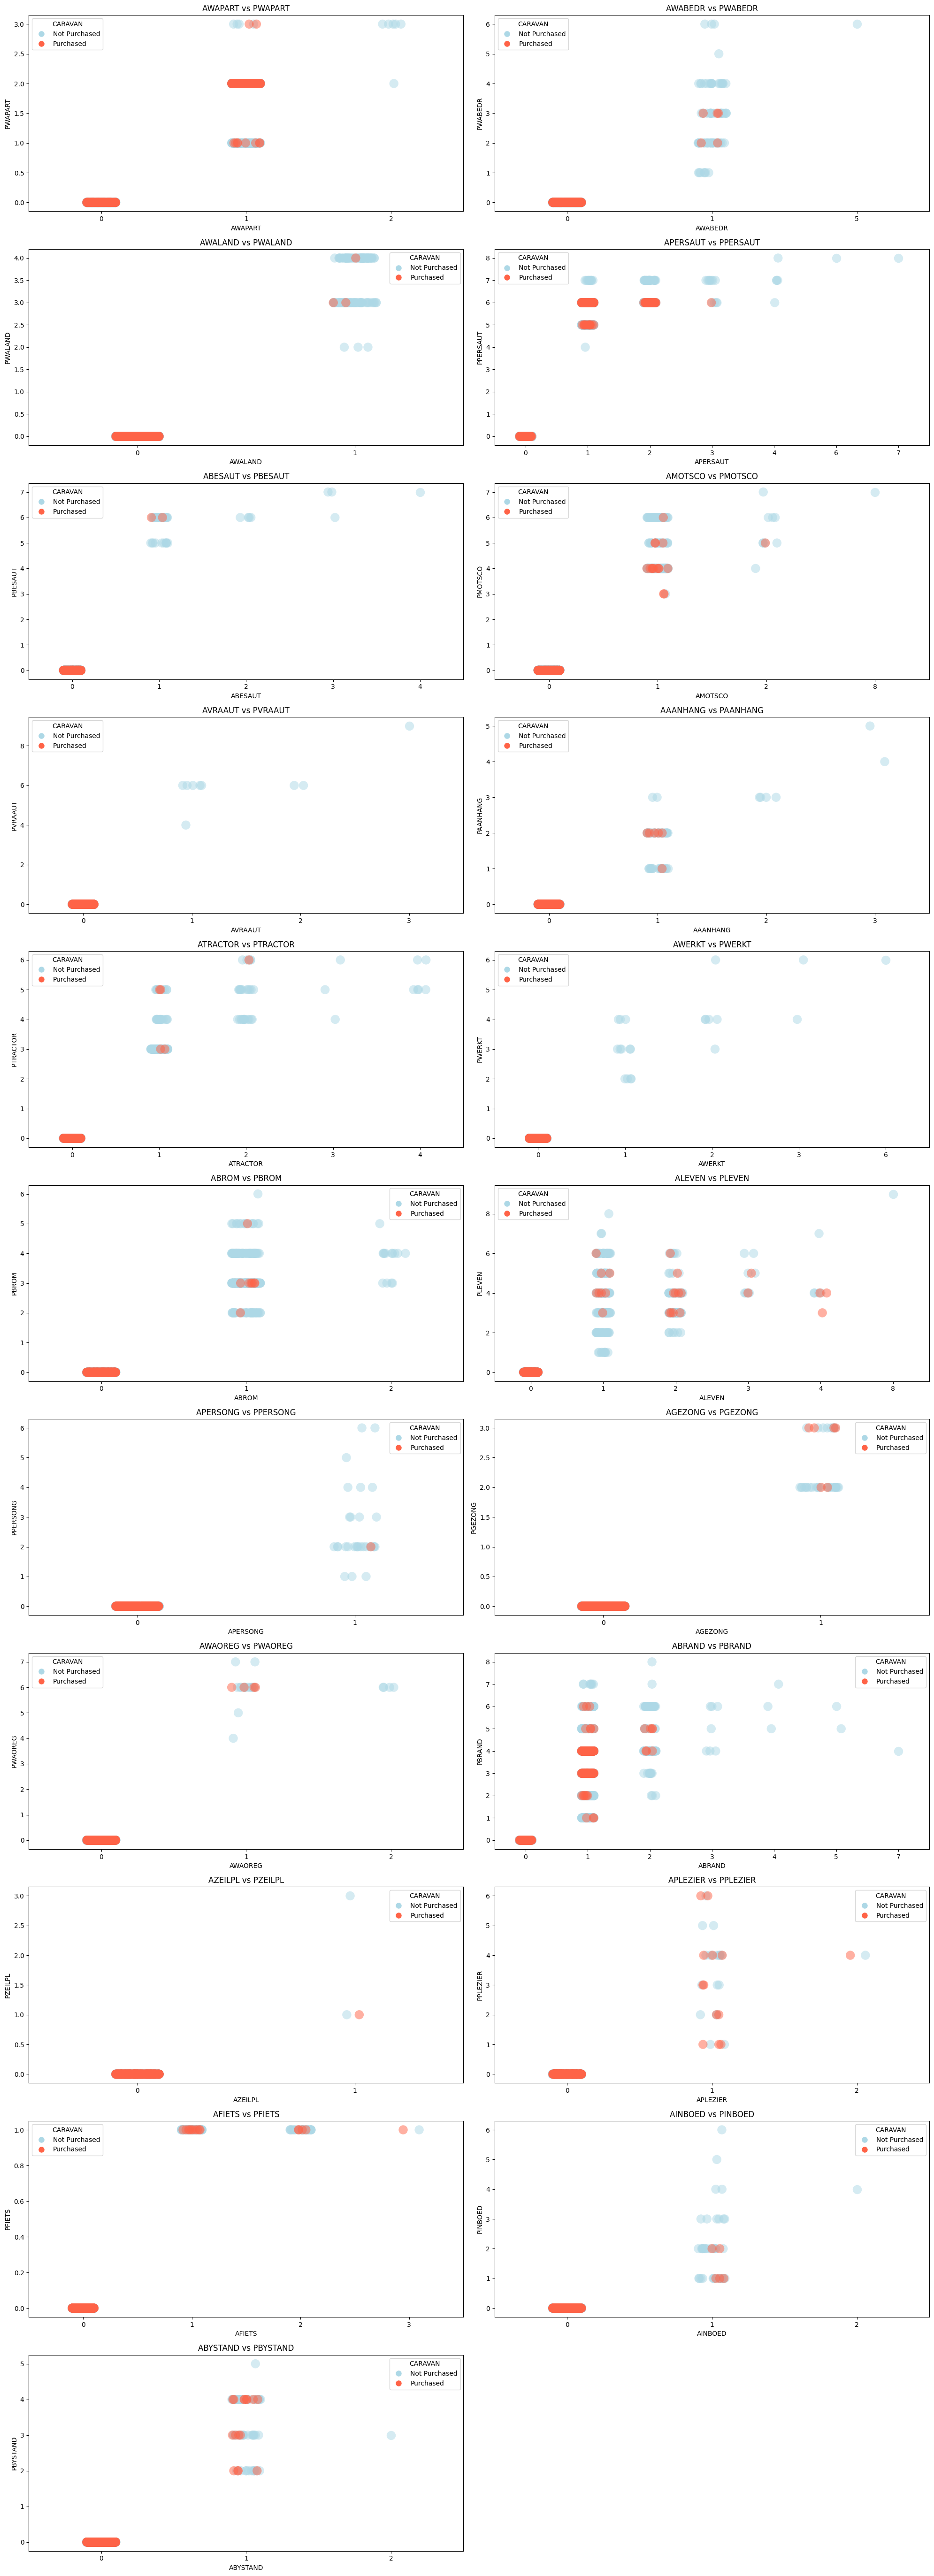

In [7]:
df_train_eda = df_train.sort_values(by='CARAVAN', ascending=True)

# Define the number of plots per row
plots_per_row = 2

# Calculate the number of rows needed
num_rows = len(column_pairs) // plots_per_row + int(len(column_pairs) % plots_per_row != 0)

# Create subplots
fig, axes = plt.subplots(num_rows, plots_per_row, figsize=(20, 5 * num_rows))

# Flatten axes for easy iteration
axes = axes.flatten()

# Define colors for the legend
legend_colors = {0: '#ADD8E6', 1: '#FF6347'}

# Plot each pair
for i, (feature1, feature2) in enumerate(column_pairs):
    sns.stripplot(x=feature2, y=feature1, data=df_train_eda, ax=axes[i], hue='CARAVAN', alpha=0.5, jitter=True, size=14, palette=legend_colors)
    axes[i].set_title(f'{feature2} vs {feature1}')
        
    handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=label) for label, color in legend_colors.items()]
    axes[i].legend(title='CARAVAN', handles=handles, labels=['Not Purchased', 'Purchased'])

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

<Axes: >

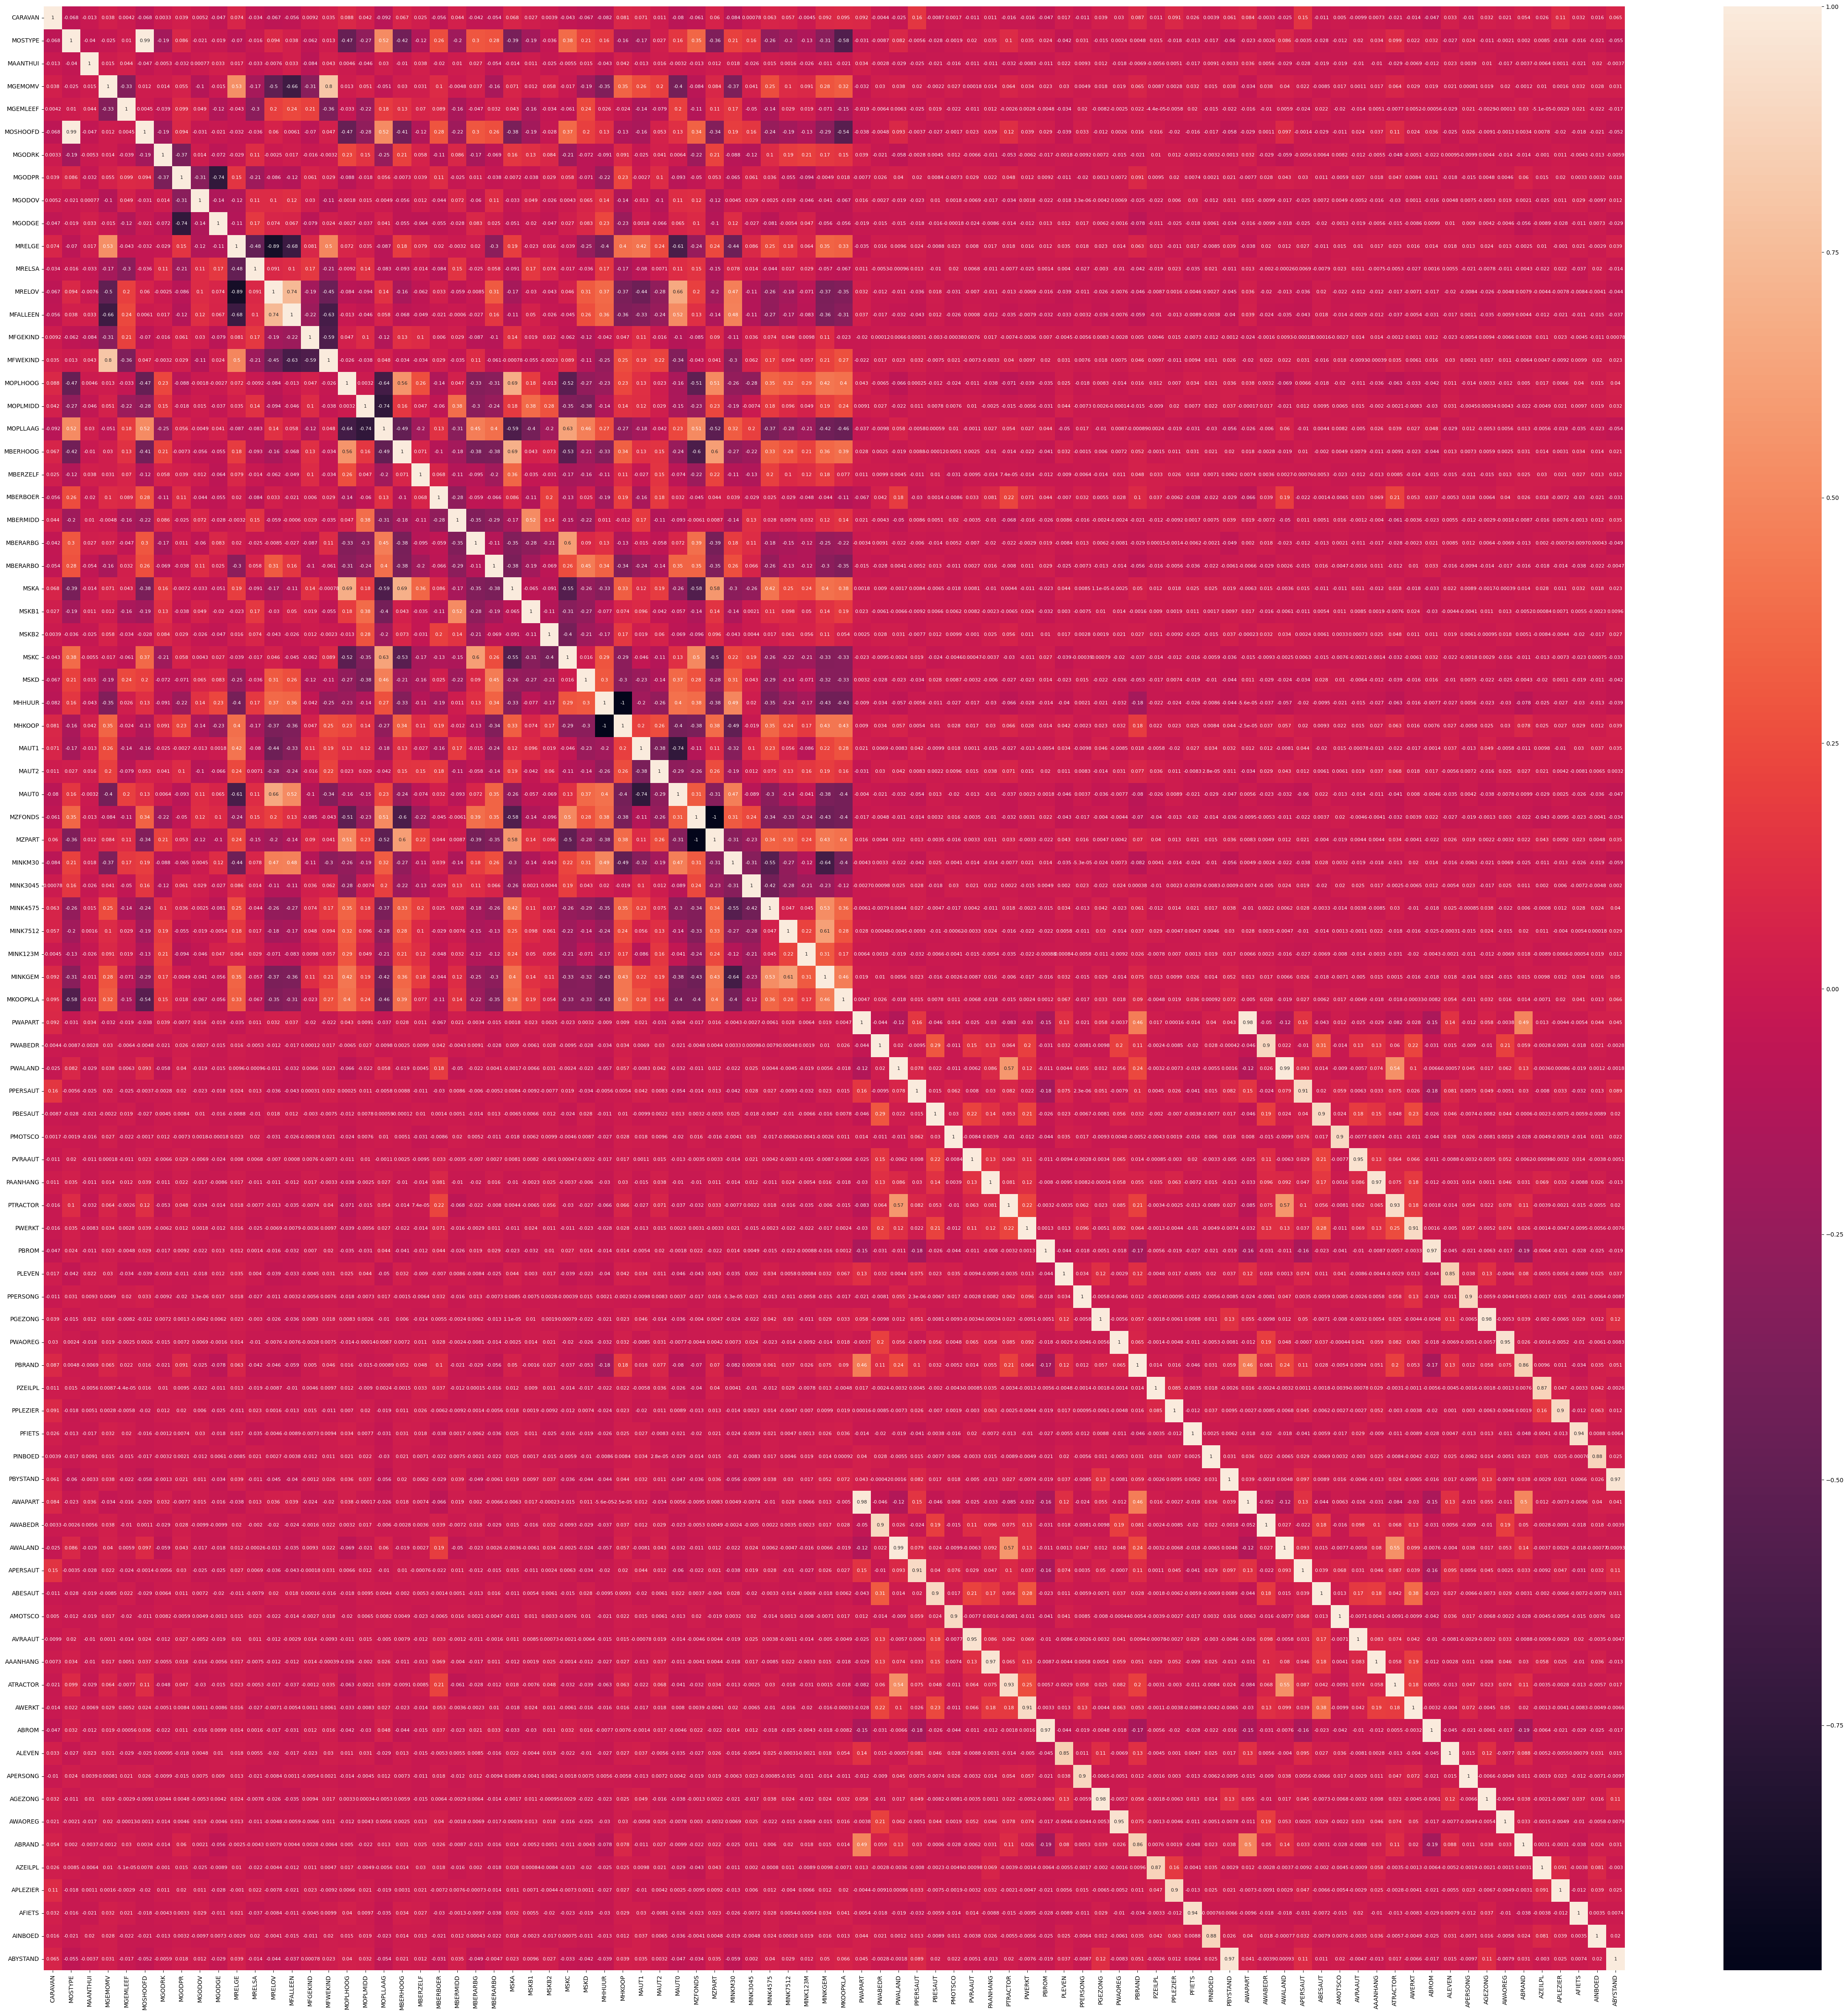

In [8]:
correlation = df_train.corr()
plt.figure(figsize=(60, 60))
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns, annot=True, annot_kws={"size": 8})

Based on the figure above, there is no strong correlation between features and label.
Also, there are many highly correlated features e.g. contribution and number of policy, public and health insurance, and etc.

To avoid falling into a trap of high dimensionality, we need to either remove or combine the features.
On top of that, highly correlated features can be redundant and do not bring any new information to the training.
We want to prepare only selected few columns before feeding to a model to reduce complexity (reduces overfitting), and computationally cheaper.

In [9]:
# Set high correlation threshold
threshold = 0.7

df_high_corr = correlation[correlation.abs() > threshold].stack().reset_index()
df_high_corr.columns = ['Feature 1', 'Feature 2', 'Correlation']

# Arrange feature pairs alphabetically
df_high_corr['Sorted Features'] = df_high_corr.apply(lambda x: '-'.join(sorted([x['Feature 1'], x['Feature 2']])), axis=1)

# Drop duplicates and keep only one of each pair
df_high_corr = df_high_corr.drop_duplicates(subset='Sorted Features').drop('Sorted Features', axis=1)
df_high_corr = df_high_corr[df_high_corr['Correlation'] != 1]
df_high_corr = df_high_corr.sort_values(by='Correlation', ascending=False).reset_index(drop=True)

print("Correlated features greater than", threshold, "are:")
df_high_corr.T

Correlated features greater than 0.7 are:


0         1         2         3         4         5   \
Feature 1     MOSTYPE   PWALAND   PGEZONG   PWAPART     PBROM  PBYSTAND   
Feature 2    MOSHOOFD   AWALAND   AGEZONG   AWAPART     ABROM  ABYSTAND   
Correlation  0.992801  0.987549  0.979954  0.979798  0.967607  0.966185   

                   6         7         8        9         10        11  \
Feature 1    PAANHANG   PVRAAUT   PWAOREG   PFIETS  PTRACTOR  PPERSAUT   
Feature 2    AAANHANG   AVRAAUT   AWAOREG   AFIETS  ATRACTOR  APERSAUT   
Correlation  0.966042  0.948656  0.948408  0.93548  0.929654  0.911019   

                   12        13        14        15        16       17  \
Feature 1      PWERKT  PPLEZIER   PMOTSCO   PBESAUT  PPERSONG  PWABEDR   
Feature 2      AWERKT  APLEZIER   AMOTSCO   ABESAUT  APERSONG  AWABEDR   
Correlation  0.909644  0.904381  0.903899  0.902919  0.897508  0.89526   

                   18        19        20        21        22        23  \
Feature 1     PINBOED   PZEILPL    PBRAND    PLEVEN   MGEMOMV    MRELOV   
Feature 2     AINBOED   AZEILPL    ABRAND    ALEVEN  MFWEKIND  MFALLEEN   
Correlation  0.875166  0.870328  0.857625  0.849416  0.796948  0.741064   

                   24        25        26        27        28        29  
Feature 1       MAUT1    MGODPR  MOPLMIDD    MRELGE   MZFONDS    MHHUUR  
Feature 2       MAUT0    MGODGE  MOPLLAAG    MRELOV    MZPART    MHKOOP  
Correlation -0.740035 -0.741764 -0.743192 -0.888041 -0.999202 -0.999529

### Feature Engineering

The decision to remove or combine these features depend on whether combining them will make sense.

For instance, we can combine the contribution and the number of policy of a product by mulpying them together to become a total of contribution.

Combining customer main and subtypes might be challenging, therefore we may drop these sort of features.

In [10]:
decode_mapping = {0:'0', 1:'1 – 49', 2:'50 – 99', 3:'100 – 199', 4:'200 – 499', 5:'500 – 999', 6:'1000 – 4999', 7:'5000 – 9999', 8:'10,000 - 19,999', 9:'>= 20,000'}

# Converting discretized value to a numeric value
def convert_range_to_numeric(range_str):
    range_str = range_str.replace(',', '').replace(' ', '').replace('-', '–').replace('>', '').replace('=', '')
    if '–' in range_str:
        val_split = range_str.split('–')
        start = int(val_split[0])
        end = int(val_split[1])
        return (start + end) / 2
    else:
        return int(range_str)

# Multiplication to combine into a new feature
def cross_product_features(df_features, column_pairs):
    for col in column_pairs:
        df_features[col[0]] = df_features[col[0]].replace(decode_mapping)
        product = ''
        product = col[0][1:]
        df_features[product] = df_features[col[0]].apply(convert_range_to_numeric)
        df_features = df_features.drop(col[0], axis=1)
        # Calculate multiplication
        df_features[product] = df_features[product] * df_features[col[1]]
        df_features = df_features.drop(col[1], axis=1)

    return df_features

In [11]:
df_train = df[df['ORIGIN'] == 'train']
df_train.drop(['ORIGIN'], axis=1, inplace=True)
df_train = cross_product_features(df_train, column_pairs)

df_no_duplicates = df_train.drop_duplicates(subset=None)
print('Removed duplicated rows:', df_train.shape[0] - df_no_duplicates.shape[0])
df_train = df_no_duplicates.copy()
print('Remaining rows:', df_train.shape[0])

print('Testing set shape:', df_train.shape)

Removed duplicated rows: 602
Remaining rows: 5220
Testing set shape: (5220, 65)


We are multiplying the contribution and the number of policy for respective product to form a new singular column.

Since the contribution value is discretized, we can take the average of it and multiply it to the number of policy.

For example:

    i. Contribution of car colicy : 50 - 99
    ii. Number of car policy       : 1
    iii. Car (new feature)          : mean of (i) * (ii) = 74.5*1 = 74.5


### Feature Selection

We are using Random Forest Classifier feature importance function to determine which features have the highest statistical significance.

In [12]:
from sklearn.feature_selection import SelectFromModel

def select_features(X_train, X_test, y_train, y_test):
    rf = RandomForestClassifier()
    rf.fit(X_train, y_train)
    y_pred_rf = rf.predict(X_test)
    
    sfm = SelectFromModel(rf, threshold='mean')
    X_train_selected = sfm.fit_transform(X_train, y_train)
    X_test_selected = sfm.transform(X_test)
    
    # Get the selected feature indices
    selected_feature_indices = sfm.get_support(indices=True)
    
    # Get the names of the selected features
    X_df = pd.DataFrame(data=X_train, columns=X_train.columns)
    selected_feature_names = X_df.columns[selected_feature_indices].tolist()    

    # Get the feature importances of all features
    feature_importances = rf.feature_importances_
    
    # Create a DataFrame to store feature names and importances
    feature_importance_df = pd.DataFrame(
        {'Feature': X_df.columns, 'Importance': feature_importances}
    )
    
    # Filter the DataFrame to include only the selected features
    selected_feature_importances = feature_importance_df.loc[selected_feature_indices]
    
    # Sort the selected features by importance
    selected_feature_importances = selected_feature_importances.sort_values(by='Importance', ascending=False).reset_index(drop=True)

    selected_feature_names = selected_feature_importances['Feature'].tolist()
 
    selected_feature_importances_desc = selected_feature_importances.sort_values(by='Importance', ascending=True).reset_index(drop=True)
    
    colors = cm.viridis(np.linspace(0, 1, len(selected_feature_importances_desc)))[::-1]

    # Plotting the horizontal bar chart
    fig, ax = plt.subplots(figsize=(10, 10))
    ax = selected_feature_importances_desc.plot(kind='barh', x='Feature', y='Importance', color=colors, legend=False, ax=ax)
    # Annotate each bar with its value
    for i, v in enumerate(selected_feature_importances_desc['Importance']):
        ax.text(v + 0.0003, i, str(round(v, 2)), color='black', va='center')
    plt.xlabel('Importance')
    plt.ylabel('Feature Name')
    plt.title('Feature Importance')
    plt.savefig('feature_importance_plot.png', bbox_inches='tight')
    plt.show()
    
    return selected_feature_names

In [13]:
X_train = df_train.drop(['CARAVAN'], axis=1)
y_train = df_train['CARAVAN']

df_test = df[df['ORIGIN'] == 'test']
df_test.drop(['ORIGIN'], axis=1, inplace=True)
df_test = cross_product_features(df_test, column_pairs)

X_test = df_test.drop(['CARAVAN'], axis=1)
y_test = df_test['CARAVAN']

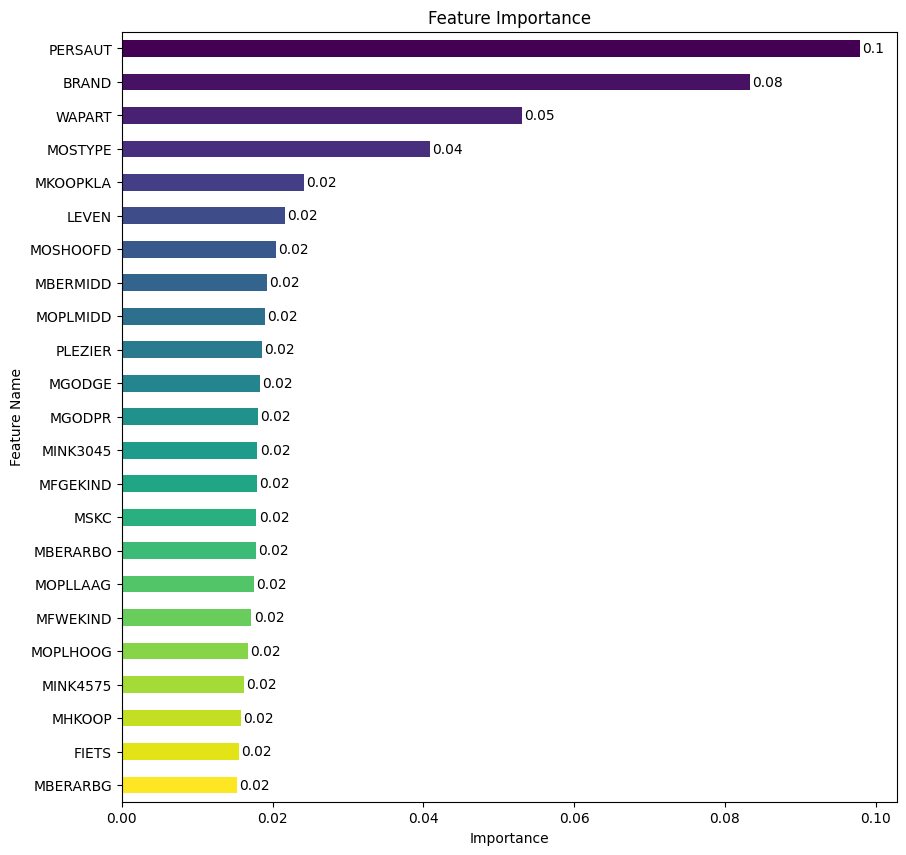

In [14]:
# Select features using Random Forest classifier
selected_feature_names = select_features(X_train, X_test, y_train, y_test)

In [15]:
# For simplicity, we are selecting the top 2 features for now.
top_features = selected_feature_names[0:2]

In [16]:
def select_top_features(X, selected_features):
    X_df = pd.DataFrame(X, columns=X.columns)
    X = X_df.loc[:, selected_features].values
    return X

In [17]:
# Keeping only the top 2 features in the predictor arrays
X_train_sel = select_top_features(X_train, top_features)
X_test_sel = select_top_features(X_test, top_features)

print('Training predictors shape:', X_train_sel.shape)
print('Testing predictors shape:', X_test_sel.shape)

Training predictors shape: (5220, 2)
Testing predictors shape: (4000, 2)


### Feature Cleanup - Outliers, Distribution, Balancing, and Scaling

#### Outliers

In [18]:
# Display outliers using box-plot diagrams
def display_outliers(df):
    n_cols = 3
    n_rows = (len(df.columns) + n_cols - 1) // n_cols
    
    # Create a figure and axes
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 4*n_rows))
    
    # Flatten the axes array for easy iteration
    axes = axes.flatten()
    
    # Iterate over each feature and plot a box plot
    for i, col in enumerate(df.columns):
        sns.boxplot(y=df[col], ax=axes[i], hue=df['CARAVAN'])
        axes[i].set_title(col, size=9,color='darkslateblue',fontweight='bold')
        axes[i].set_xlabel('')
        axes[i].set_ylabel('')
        if i >= len(df.columns) - 1:
            break
    
    # Hide empty subplots
    for j in range(i+1, len(axes)):
        axes[j].axis('off')
    
    plt.tight_layout()
    plt.show()

In [19]:
# Display outliers using scatter plot diagram to visualize the distribution of each data points
def display_outliers_dist(df):
    n_cols = 3
    n_rows = (len(df.columns) + n_cols - 1) // n_cols
    plt.figure(figsize=(20, 4*n_rows))
    # plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    
    for i,col in enumerate(df.columns,1):
        plt.subplot(n_rows, n_cols, i)
        plt.title(col, size=9,color='darkslateblue',fontweight='bold')
        plt.scatter(range(len(df[col])),df[col], c=df['CARAVAN'], s=40, marker= 'o', alpha=0.5)
        plt.yticks()
        plt.xticks()
    plt.show()


CARAVAN
0    4880
1     340
Name: count, dtype: int64


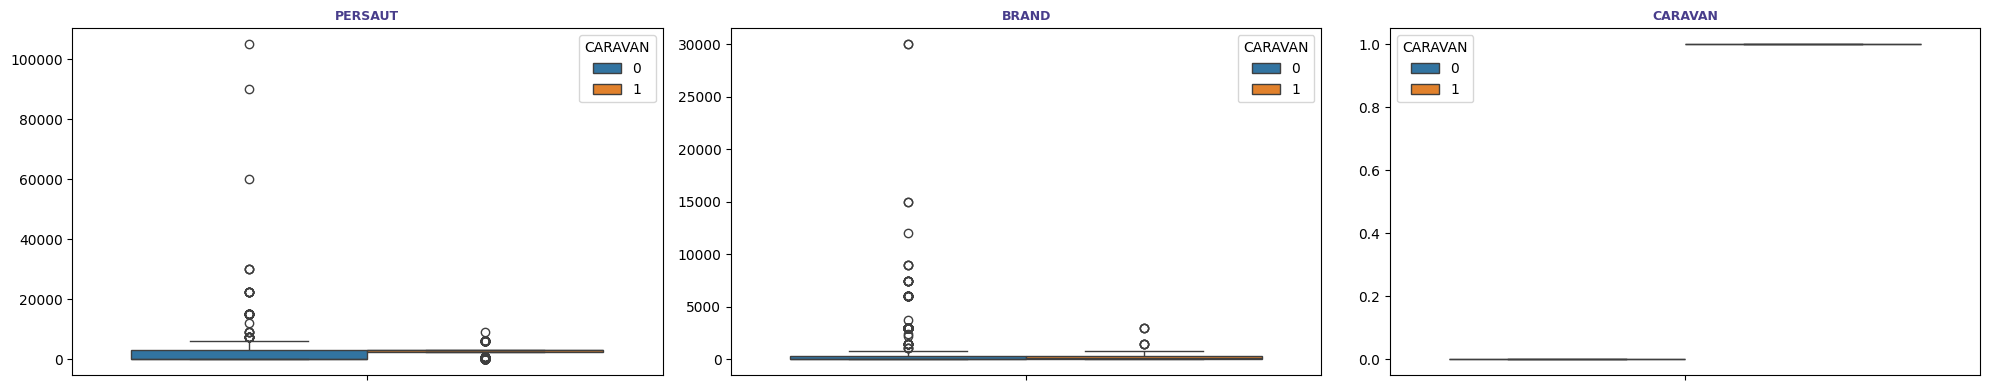

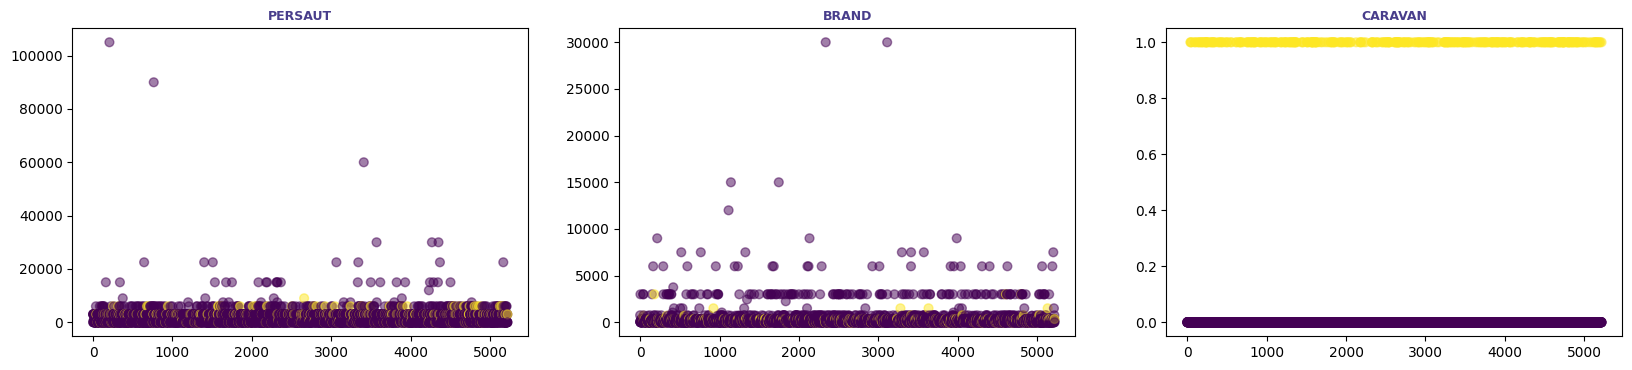

In [20]:
df_train_sel = pd.DataFrame(data=X_train_sel, columns=top_features)
df_train_sel['CARAVAN'] = y_train.reset_index(drop=True)
print(df_train_sel['CARAVAN'].value_counts())
display_outliers(df_train_sel)
display_outliers_dist(df_train_sel)

Based on the diagrams above, we have few outliers in CAR and FIRE feature. Many of them are customers that not purchased the caravan insurance.

In [21]:
# Remove outliers using IQR method
def remove_outliers(df):
    df_cleaned = df.copy()
    df_outliers = pd.DataFrame([[len(df_cleaned.columns)] * len(df_cleaned.columns)], columns=df_cleaned.columns)
    
    for column in df.columns:
        if column != 'CARAVAN':
            # Calculate the first quartile (Q1)
            Q1 = df[column].quantile(0.25)
            # Calculate the third quartile (Q3)
            Q3 = df[column].quantile(0.75)
            # Calculate the interquartile range (IQR)
            IQR = Q3 - Q1
            # Define the lower bound as Q1 - 1.5 * IQR and the upper bound as Q3 + 1.5 * IQR
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
    
            outliers = sum((df[column] < lower_bound) | (df[column] > upper_bound))
            df_outliers[column] = outliers
            # Remove rows with values outside the 1.5 * IQR range
            df_cleaned = df_cleaned[(df_cleaned[column] >= lower_bound) & (df[column] <= upper_bound)]

    print('Number of outliers removed:', df.shape[0] - df_cleaned.shape[0])  
    return df_cleaned, df_outliers

In [22]:
# Remove outliers for all columns using IQR method
df_train_cleaned, df_train_outliers = remove_outliers(df_train_sel)

print('Training set shape:', df_train_cleaned.shape)

df_train_outliers = df_train_outliers.T.sort_values(by=0, ascending=False)
df_train_outliers = df_train_outliers.rename(columns={df_train_outliers.columns[0]: 'Outliers Count'})
df_train_outliers

# df_train = df_no_outliers.copy()

Number of outliers removed: 227
Training set shape: (4993, 3)


Outliers Count
BRAND               185
PERSAUT              50
CARAVAN               3

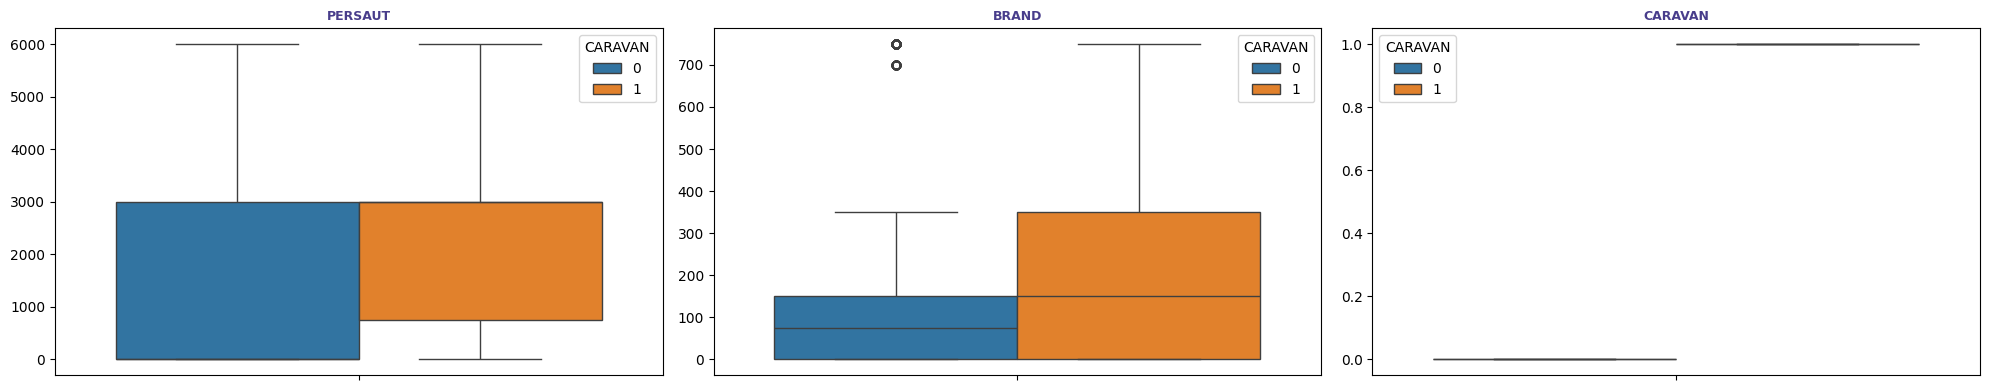

In [23]:
display_outliers(df_train_cleaned)

#### Data Distribution

In [24]:
# Display the histogram of the columns
def display_dist(df, title):
    n_cols = 3
    n_rows = ((len(df.columns) + n_cols - 1) // n_cols)
    plt.figure(figsize=(20, 6 * n_rows))
    
    # Plot for df_train_cleaned
    for i, col in enumerate(df.columns, 1):
        skewness = round(df[col].skew(), 2)
        plt.subplot(2, n_cols, i)
        plt.title(f"Distribution of {title} {col} Data: Skewness: {skewness}")
        sns.histplot(df[col], kde=True)
        plt.tight_layout()
    
    plt.tight_layout()
    plt.show()

In [25]:
# Feature transformation using cube root or square root as this is the best compared to power and log transformation.
def handle_skewness(df, type):
    for col in df.columns:
        if type == 'cbrt':
            df[col] = np.cbrt(df[col])
        elif type == 'sqrt':
            df[col] = np.sqrt(df[col])
    return df

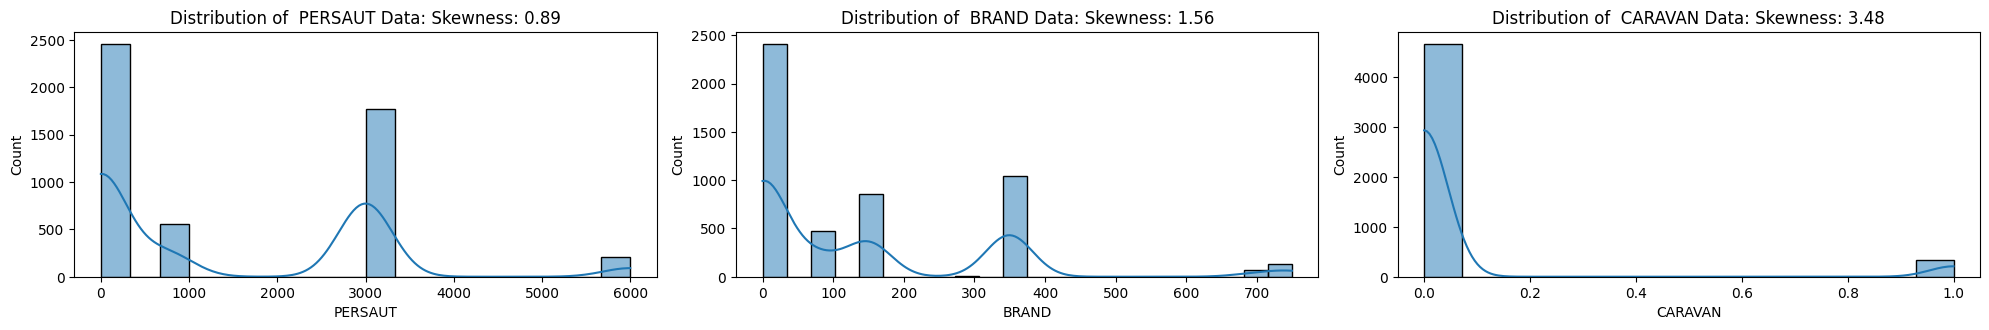

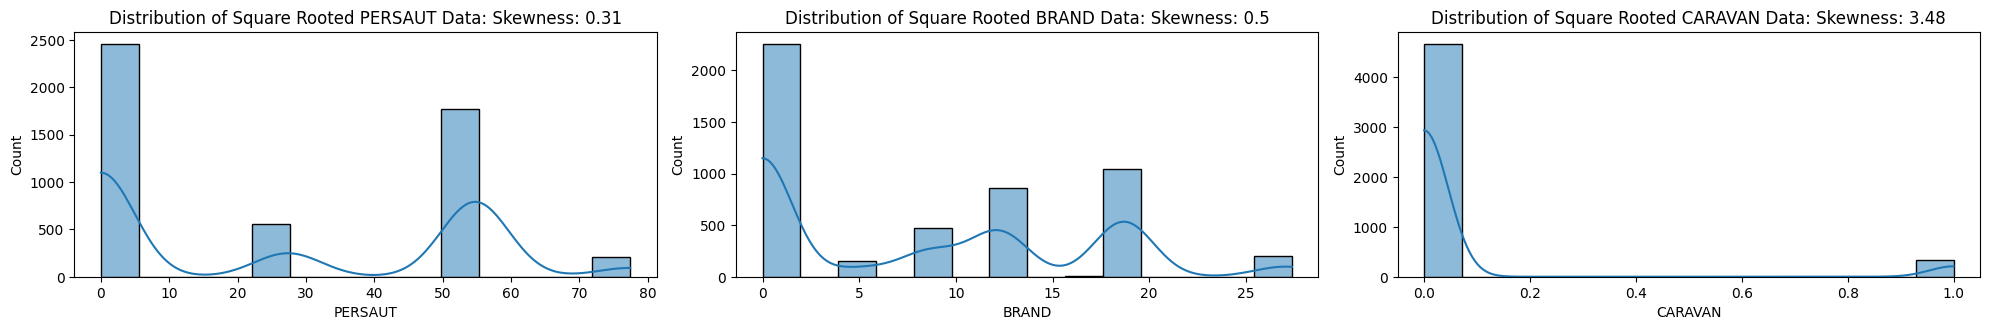

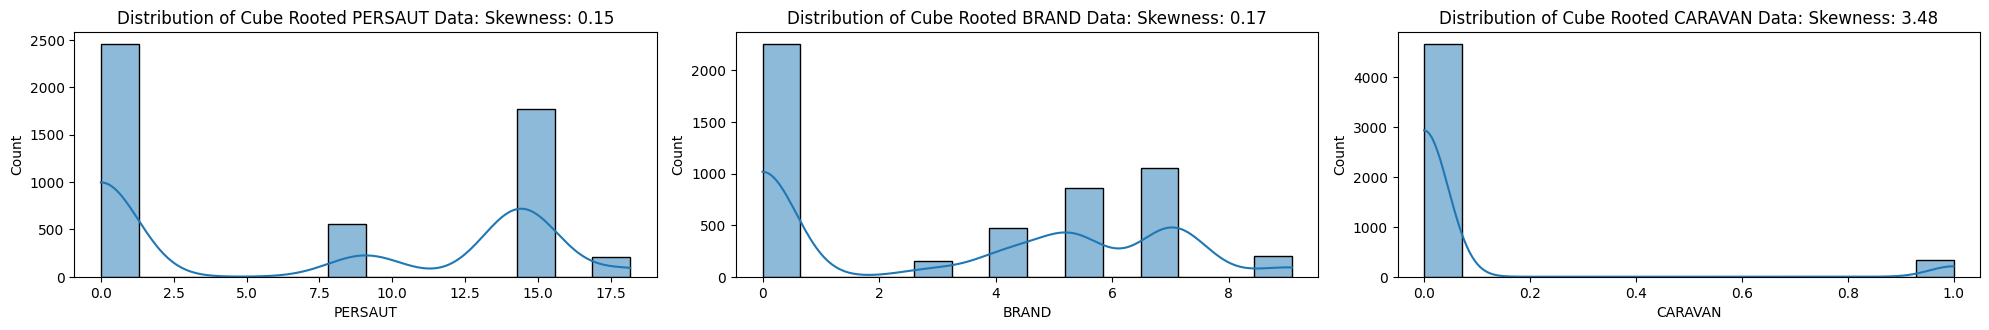

In [26]:
display_dist(df_train_cleaned, '')

df_train_sqrt = df_train_cleaned.copy()
df_train_sqrt = handle_skewness(df_train_sqrt, 'sqrt')
display_dist(df_train_sqrt, 'Square Rooted')

df_train_cbrt = df_train_cleaned.copy()
df_train_cbrt = handle_skewness(df_train_cbrt, 'cbrt')
display_dist(df_train_cbrt, 'Cube Rooted')

Based on the diagrams above, applying feature transformation using cube root results in a more normal distribution for CAR and FIRE feature. Therefore, we are using cube root transformation.

In [27]:
X_train = df_train_cbrt.drop(['CARAVAN'], axis=1)
y_train = df_train_cbrt['CARAVAN']

df_test_sel = pd.DataFrame(data=X_test_sel, columns=top_features)
df_test_sel['CARAVAN'] = y_test.reset_index(drop=True)

df_test_cbrt = df_test_sel.copy()
df_test_cbrt = handle_skewness(df_test_cbrt, 'cbrt')

X_test = df_test_cbrt.drop(['CARAVAN'], axis=1)
y_test = df_test_cbrt['CARAVAN']

print('Training set shape:', X_train.shape, y_train.shape)
print('Testing set shape:', X_test.shape, y_test.shape)

Training set shape: (4993, 2) (4993,)
Testing set shape: (4000, 2) (4000,)


#### Data Balancing

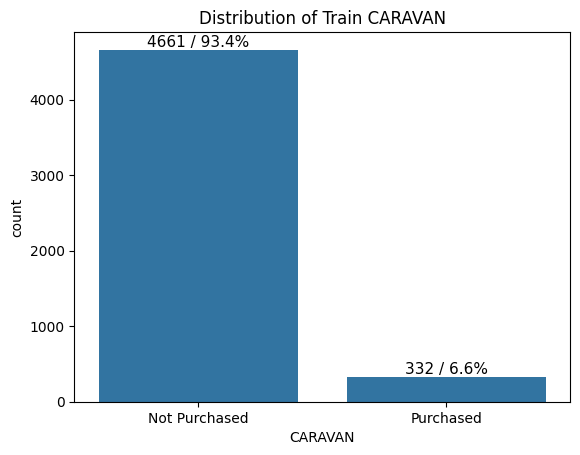

In [28]:
# Create the count plot
ax = sns.countplot(x='CARAVAN', data=df_train_cbrt)

# Calculate percentages
total = len(df_train_cbrt)
for p in ax.patches:
    height = p.get_height()
    percentage = f'{height / total * 100:.1f}%'
    count = f'{height:.0f}'
    ax.annotate(f'{count} / {percentage}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')

# Set title
ax.set_title('Distribution of Train CARAVAN')

# Map label classes to 'No' and 'Yes'
ax.tick_params(axis='x', labelrotation=0)
ax.set_xticklabels(['Not Purchased', 'Purchased'])

plt.show()

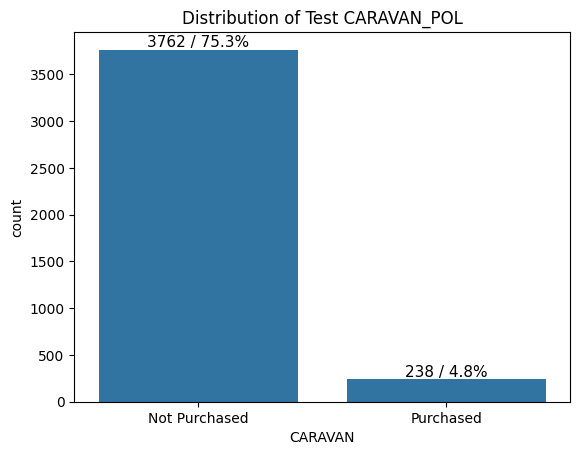

In [29]:
# Create the count plot
ax = sns.countplot(x='CARAVAN', data=df_test_cbrt)

# Calculate percentages
total = len(df_train_cbrt)
for p in ax.patches:
    height = p.get_height()
    percentage = f'{height / total * 100:.1f}%'
    count = f'{height:.0f}'
    ax.annotate(f'{count} / {percentage}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')

# Set title
ax.set_title('Distribution of Test CARAVAN_POL')

# Map label classes to 'No' and 'Yes'
ax.tick_params(axis='x', labelrotation=0)
ax.set_xticklabels(['Not Purchased', 'Purchased'])

plt.show()

The distribution of the label class is heavily biased towards *Not Purchased* class. If we do not handle this, the training will be biased to predict to the majority class.

We can balance the classes using methods like random oversampling, random undersampling, SMOTE, and SMOTE Tomek. We will test out which one will yield the best result.

Since our both sets are heavily imbalanced, we should evaluate our model based on recall-precision metrics, but not the accuracy. The reason is, the model can be 90%+ accurate by predicting the majority class correctly, eventhough it mispredicts the who minority class.

In [30]:
# Sample the training dataset

ros = RandomOverSampler(random_state=1, sampling_strategy='minority')
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)
print('ROS shape', X_train_ros.shape)

rus = RandomUnderSampler(random_state=1)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)
print('RUS shape', X_train_rus.shape)

smote = SMOTE(random_state=1)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
print('SMOTE shape', X_train_smote.shape)

smotetk = SMOTETomek(random_state=1)
X_train_smotetk, y_train_smotetk = smotetk.fit_resample(X_train, y_train)
print('SMOTE Tomek shape', X_train_smotetk.shape)

ROS shape (9322, 2)
RUS shape (664, 2)
SMOTE shape (9322, 2)
SMOTE Tomek shape (9322, 2)


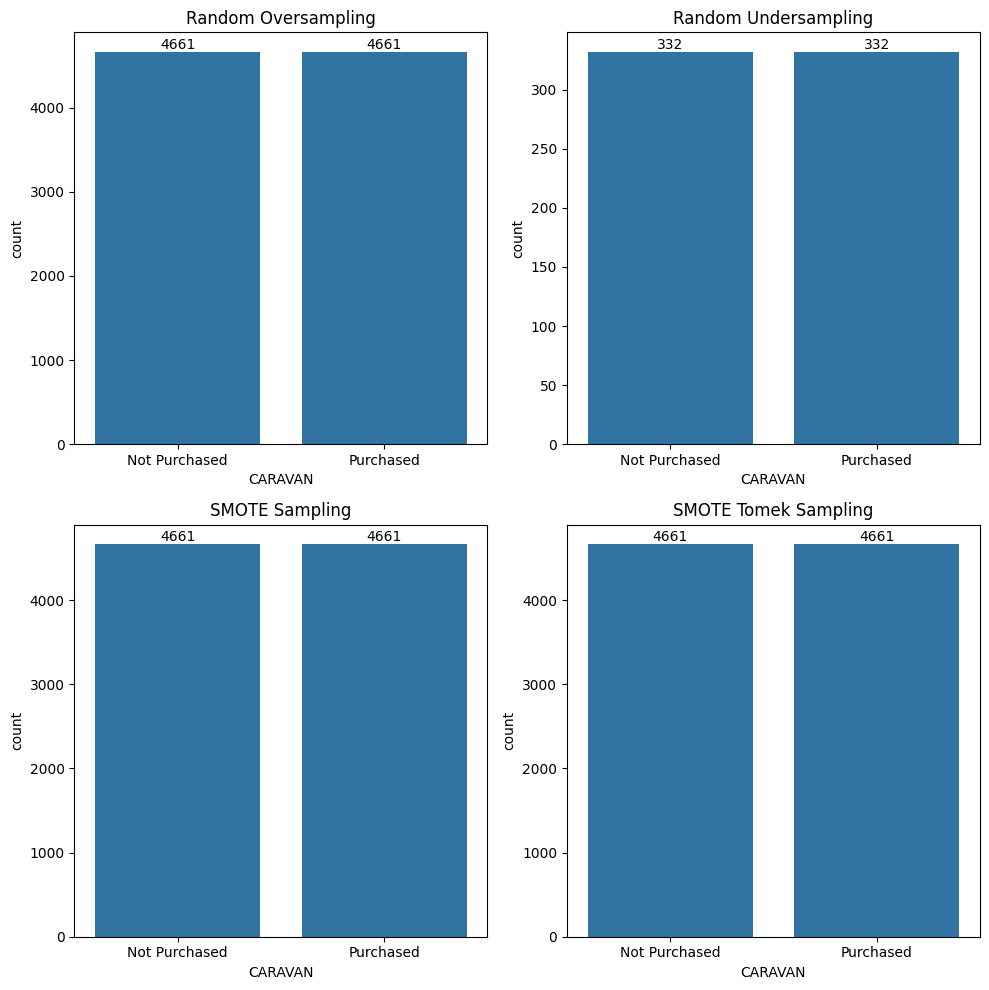

In [31]:
# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

sns.countplot()
# Plot countplots
sns.countplot(x='CARAVAN', data=pd.DataFrame(data=y_train_ros, columns=['CARAVAN']), ax=axes[0, 0])
axes[0, 0].set_title('Random Oversampling')
axes[0, 0].bar_label(axes[0, 0].containers[0])
axes[0, 0].tick_params(axis='x', labelrotation=0)
axes[0, 0].set_xticklabels(['Not Purchased', 'Purchased'])

sns.countplot(x='CARAVAN', data=pd.DataFrame(data=y_train_rus, columns=['CARAVAN']), ax=axes[0, 1])
axes[0, 1].set_title('Random Undersampling')
axes[0, 1].bar_label(axes[0, 1].containers[0])
axes[0, 1].tick_params(axis='x', labelrotation=0)
axes[0, 1].set_xticklabels(['Not Purchased', 'Purchased'])

sns.countplot(x='CARAVAN', data=pd.DataFrame(data=y_train_smote, columns=['CARAVAN']), ax=axes[1, 0])
axes[1, 0].set_title('SMOTE Sampling')
axes[1, 0].bar_label(axes[1, 0].containers[0])
axes[1, 0].tick_params(axis='x', labelrotation=0)
axes[1, 0].set_xticklabels(['Not Purchased', 'Purchased'])

sns.countplot(x='CARAVAN', data=pd.DataFrame(data=y_train_smotetk, columns=['CARAVAN']), ax=axes[1, 1])
axes[1, 1].set_title('SMOTE Tomek Sampling')
axes[1, 1].bar_label(axes[1, 1].containers[0])
axes[1, 1].tick_params(axis='x', labelrotation=0)
axes[1, 1].set_xticklabels(['Not Purchased', 'Purchased'])

plt.tight_layout()
plt.show()

#### Scaling - Standardization

We are scaling the features to have the standard range of values across all the features. In this case, we are using Z-score method to do that since our features are close the gaussian distribution (bell-shaped curve).

In [32]:
scaler_ros = StandardScaler()
X_train_ros = scaler_ros.fit_transform(X_train_ros)
X_test_ros = scaler_ros.transform(X_test)

scaler_rus = StandardScaler()
X_train_rus = scaler_rus.fit_transform(X_train_rus)
X_test_rus = scaler_rus.transform(X_test)

scaler_smote = StandardScaler()
X_train_smote = scaler_smote.fit_transform(X_train_smote)
X_test_smote = scaler_smote.transform(X_test)

scaler_smotetk = StandardScaler()
X_train_smotetk = scaler_smotetk.fit_transform(X_train_smotetk)
X_test_smotetk = scaler_smotetk.transform(X_test)

In [33]:
def display_clf_metrics(clf, X_train, X_test, y_train, y_test, balancing_type):
    clf.fit(X_train, y_train)
    
    # Predict probabilities for the test set
    y_scores = clf.predict_proba(X_test)[:, 1]
    # print(y_scores)
    # Lower the threshold to 0.5
    threshold = 0.5
    y_pred = (y_scores > threshold).astype(int)

    # Compute precision and recall values
    precision, recall, _ = precision_recall_curve(y_test, y_pred)
    
    recall_score_ = recall_score(y_test, y_pred)
    # print('Average Recall:', recall_score_)
    average_precision = average_precision_score(y_test, y_pred)

    # Plot precision-recall curve
    plt.figure(figsize=(12, 2))
    plt.step(recall, precision, where='post')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('{} Precision-Recall curve: Avg Precision={:.2f}'.format(balancing_type, average_precision))
    plt.show()

    pred_ytrain = clf.predict(X_train)
    pred_ytest = clf.predict(X_test)
    acc_score_train = round(accuracy_score(y_train, pred_ytrain)*100, 2)
    acc_score_test = round(accuracy_score(y_test, pred_ytest)*100, 2)
    prec_train = round(precision_score(y_train, pred_ytrain)*100, 2)
    prec_test = round(precision_score(y_test, pred_ytest)*100, 2)
    rec_train = round(recall_score(y_train, pred_ytrain)*100, 2)
    rec_test = round(recall_score(y_test, pred_ytest)*100, 2)

    # Create subplots
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    cm_train = metrics.confusion_matrix(y_train, pred_ytrain)
    cm_display_train = ConfusionMatrixDisplay(confusion_matrix = cm_train, display_labels = ['Not Purchased', 'Purchased'],)
    cm_display_train.plot(ax=axes[0], colorbar=False)
    axes[0].set_title('\n' + f'{balancing_type} Confusion Matrix - Training Set\n\n' + f'Accuracy score: {acc_score_train} %\n' + f'Precision score: {prec_train} %\n' + f'Recall score: {rec_train} %\n\n')
    
    cm_test = metrics.confusion_matrix(y_test, pred_ytest)
    cm_display_test = ConfusionMatrixDisplay(confusion_matrix = cm_test, display_labels = ['Not Purchased', 'Purchased'])
    cm_display_test.plot(ax=axes[1], colorbar=False)
    axes[1].set_title('\n' + f'{balancing_type} Confusion Matrix - Testing Set\n\n' + f'Accuracy score: {acc_score_test} %\n' + f'Precision score: {prec_test} %\n' + f'Recall score: {rec_test} %\n\n')
    
    plt.show()

    print('\n')

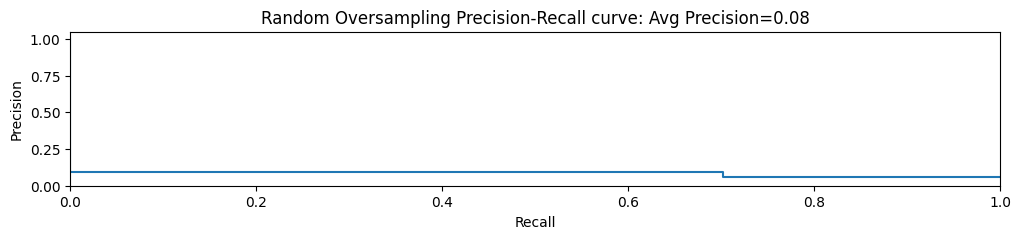

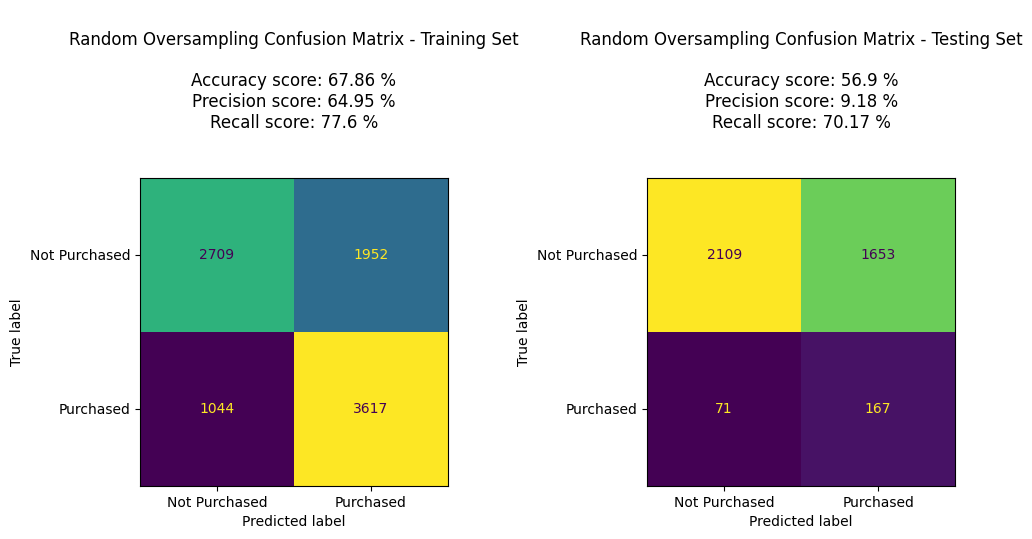

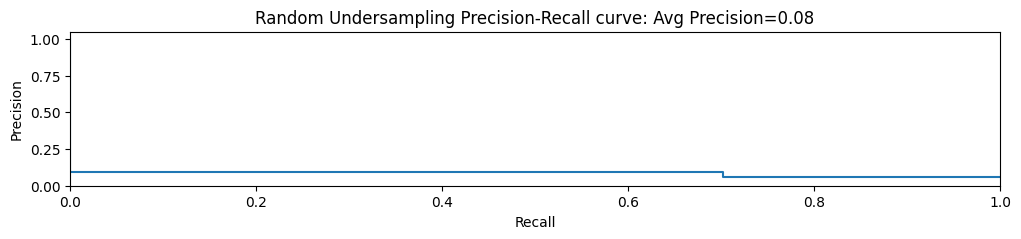

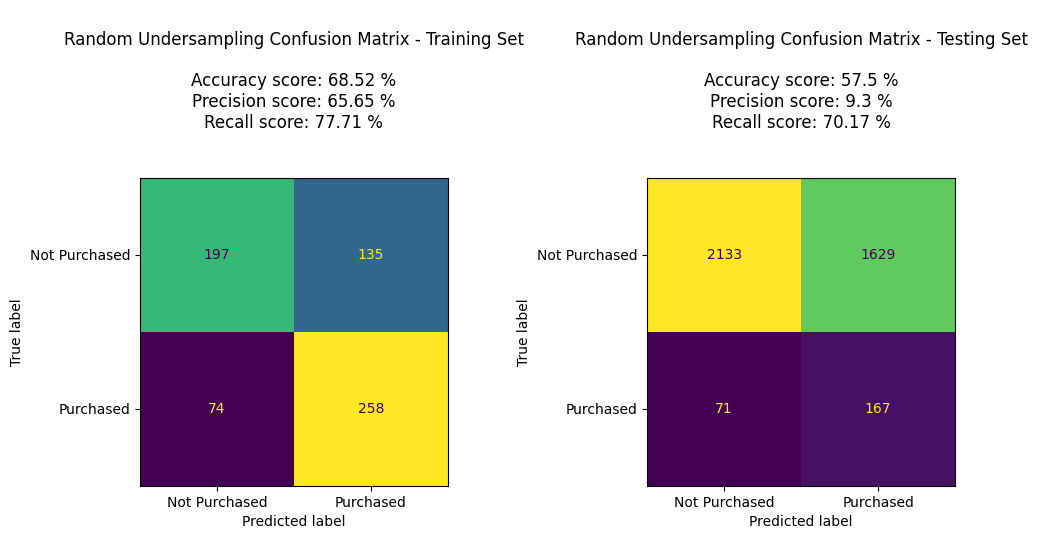

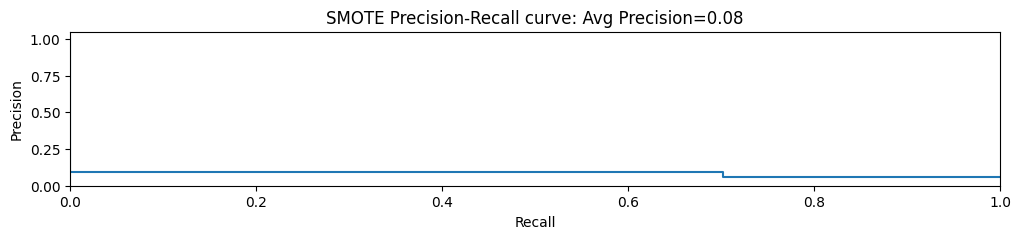

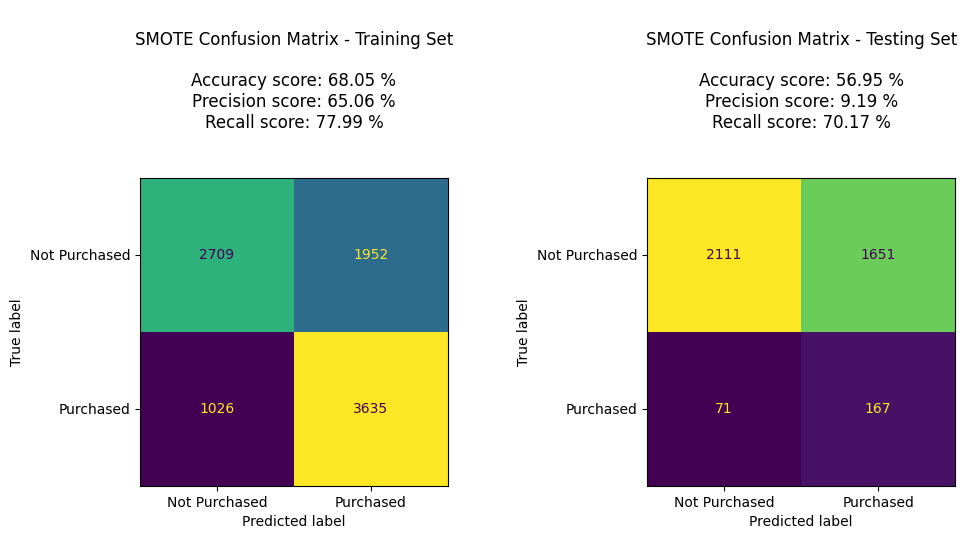

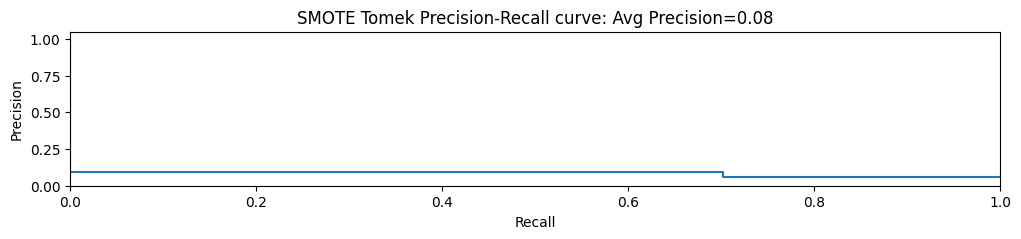

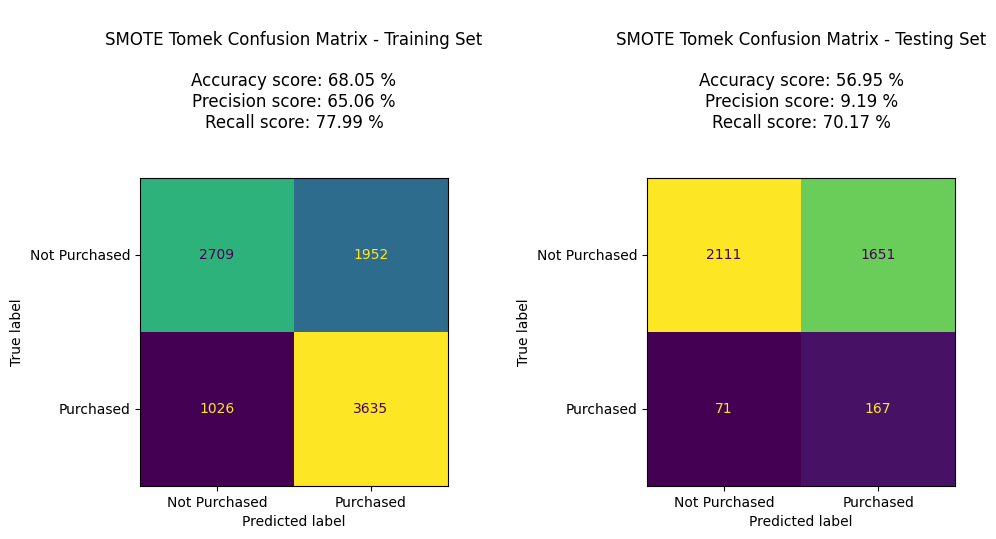

In [34]:
# Train a naive bayes classifier
clf = GaussianNB()
display_clf_metrics(clf, X_train_ros, X_test_ros, y_train_ros, y_test, 'Random Oversampling')
display_clf_metrics(clf, X_train_rus, X_test_rus, y_train_rus, y_test, 'Random Undersampling')
display_clf_metrics(clf, X_train_smote, X_test_smote, y_train_smote, y_test, 'SMOTE')
display_clf_metrics(clf, X_train_smotetk, X_test_smotetk, y_train_smotetk, y_test, 'SMOTE Tomek')

We are choosing the Random Undersampling method because it yields a slightly better precision compare to other methods.

### Modelling

We are going to test out the classifiers below to see which one has a better recall-precision ratio.

Classifiers:

    1. Decision Tree
    2. Gaussian Naive Bayes
    3. Gradient Boosting
    4. K-Nearest Neighbors
    5. Logistic Regression
    6. Random Forest
    7. Support Vector Machine
    8. XGBoost

In [35]:
def aggregate_model_results(model_name, X_train, y_train, X_test, y_test, results, clf):

    # Define the scoring metrics
    scoring = {
        'accuracy': make_scorer(accuracy_score),
        'precision': make_scorer(precision_score),
        'recall': make_scorer(recall_score),
        'roc_auc': make_scorer(roc_auc_score)
    }
    
    pred_ytrain = clf.predict(X_train)
    pred_ytest = clf.predict(X_test)

    tn, fp, fn, tp = confusion_matrix(y_train, pred_ytrain).ravel()
    train_tp = tp
    train_fp = fp
    
    tn, fp, fn, tp = confusion_matrix(y_test, pred_ytest).ravel()
    test_tp = tp
    test_fp = fp
    
    acc_score_train = round(accuracy_score(y_train, pred_ytrain)*100, 2)
    acc_score_test = round(accuracy_score(y_test, pred_ytest)*100, 2)
    prec_score_train = round(precision_score(y_train, pred_ytrain)*100, 2)
    prec_score_test = round(precision_score(y_test, pred_ytest)*100, 2)
    rec_score_train = round(recall_score(y_train, pred_ytrain)*100, 2)
    rec_score_test = round(recall_score(y_test, pred_ytest)*100, 2)

    new_row_data = [model_name, acc_score_train, acc_score_test, prec_score_train, prec_score_test, rec_score_train, rec_score_test, train_tp, test_tp, train_fp, test_fp]
    results.loc[len(results)] = new_row_data

    # Create subplots
    fig, axes = plt.subplots(1, 2, figsize=(20, 8))
    cm_train = metrics.confusion_matrix(y_train, pred_ytrain)
    cm_display_train = ConfusionMatrixDisplay(confusion_matrix = cm_train, display_labels = ['Not Purchased', 'Purchased'])
    cm_display_train.plot(ax=axes[0])
    axes[0].set_title('\n' + f'{model_name} Confusion Matrix - Training Set\n\n' + f'Accuracy score: {acc_score_train} %\n' + f'Precision score: {prec_score_train} %\n' + f'Recall score: {rec_score_train} %\n\n')
    
    cm_test = metrics.confusion_matrix(y_test, pred_ytest)
    cm_display_test = ConfusionMatrixDisplay(confusion_matrix = cm_test, display_labels = ['Not Purchased', 'Purchased'])
    cm_display_test.plot(ax=axes[1])
    axes[1].set_title('\n' + f'{model_name} Confusion Matrix - Testing Set\n\n' + f'Accuracy score: {acc_score_test} %\n' + f'Precision score: {prec_score_test} %\n' + f'Recall score: {rec_score_test} %\n\n')
    
    plt.show()
    
    return results

In [36]:
model_results = pd.DataFrame(
    columns=['Classifier', 'Train Accuracy %', 'Test Accuracy %', 'Train Precision %', 'Test Precision %', 'Train Recall %', 'Test Recall %', 'Train True Positive', 'Test True Positive', 'Train False Positive', 'Test False Positive']
)

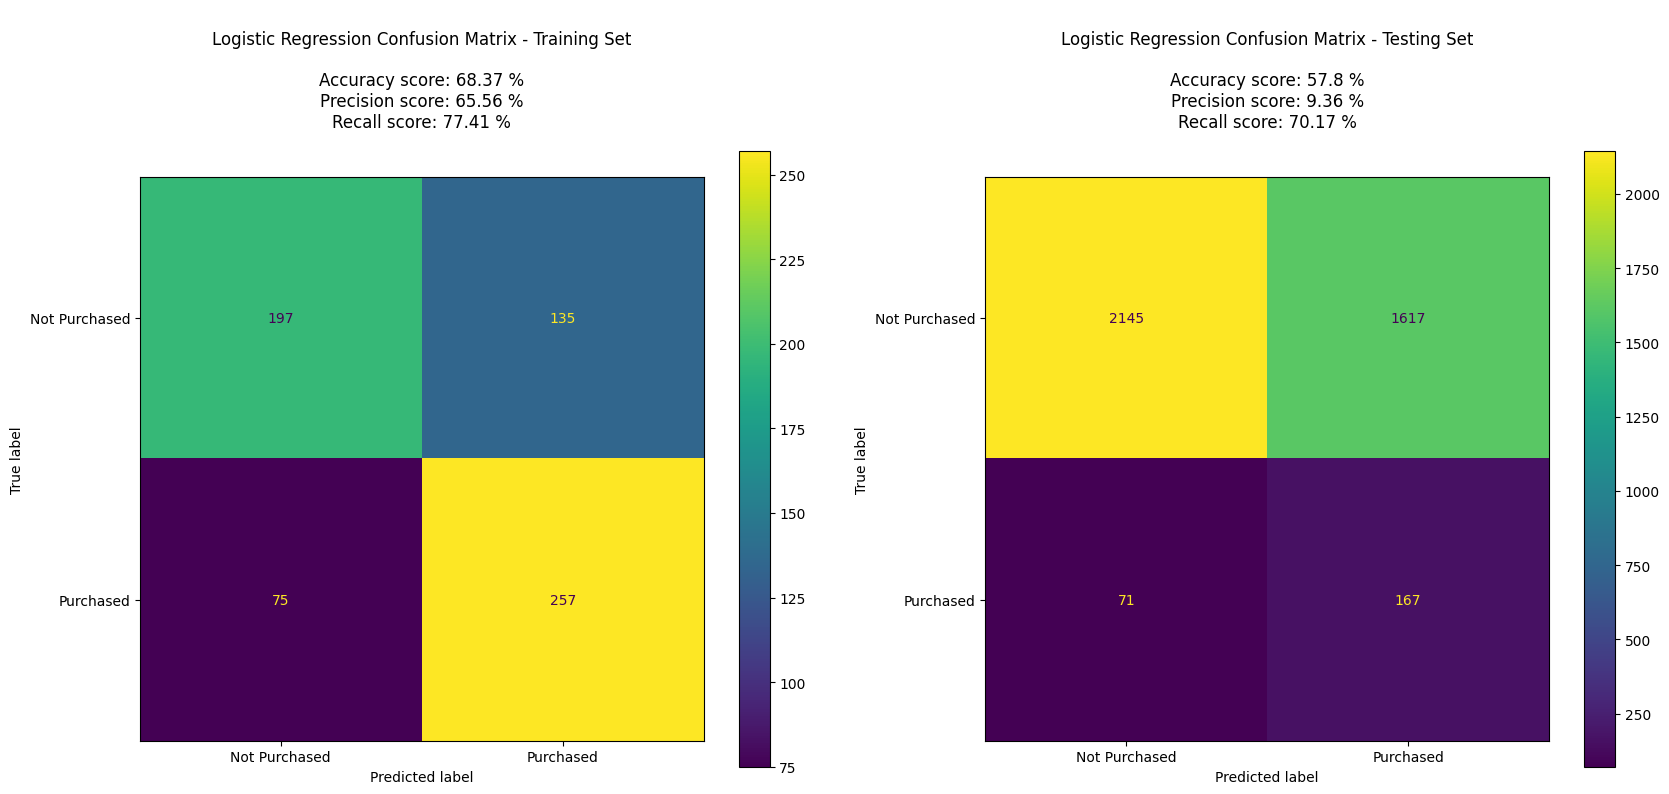

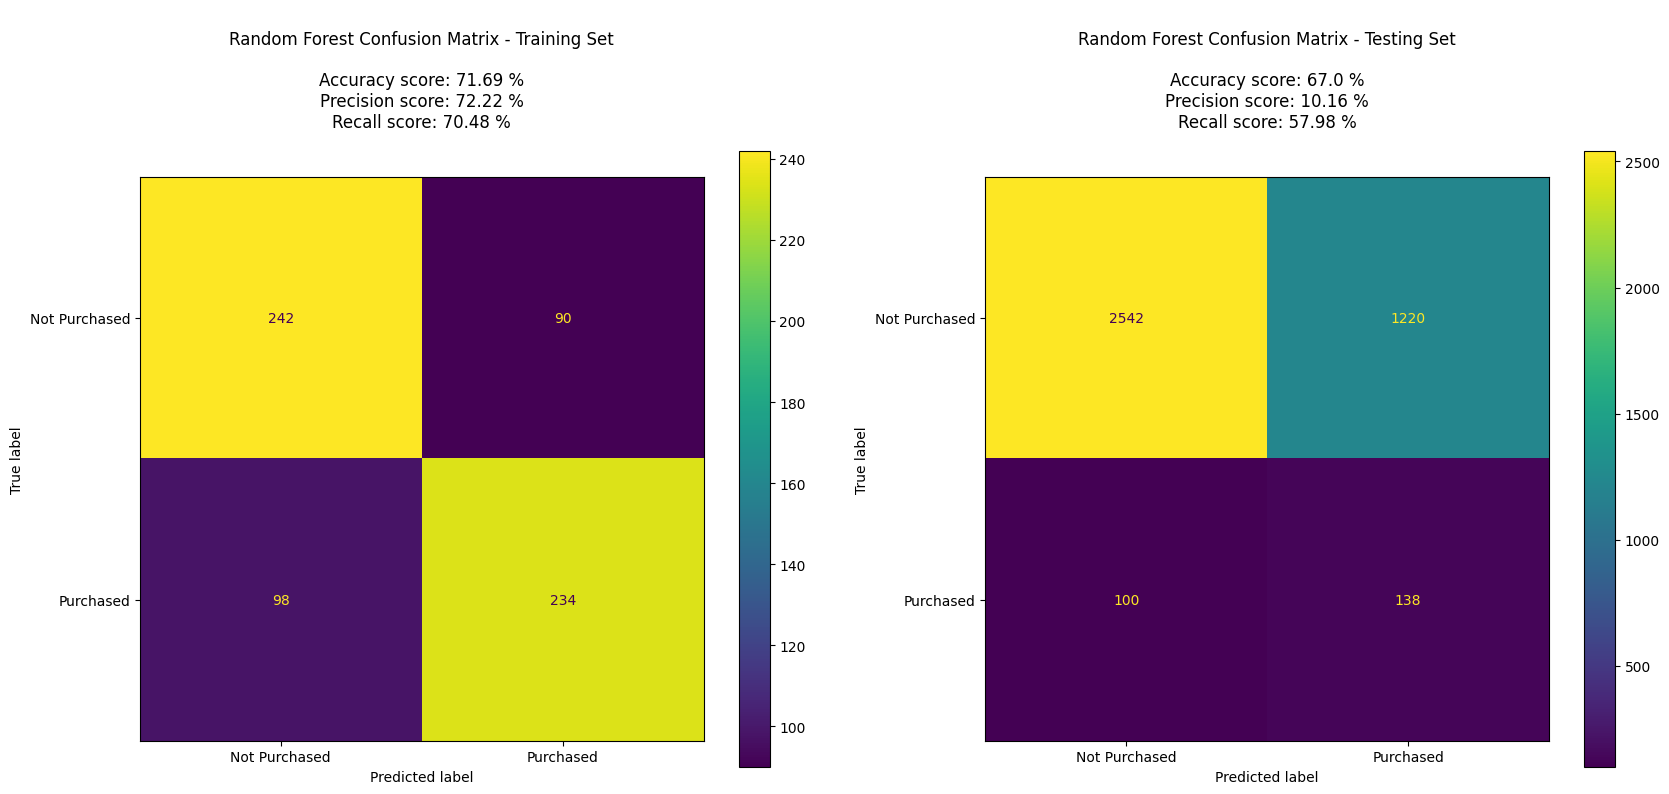

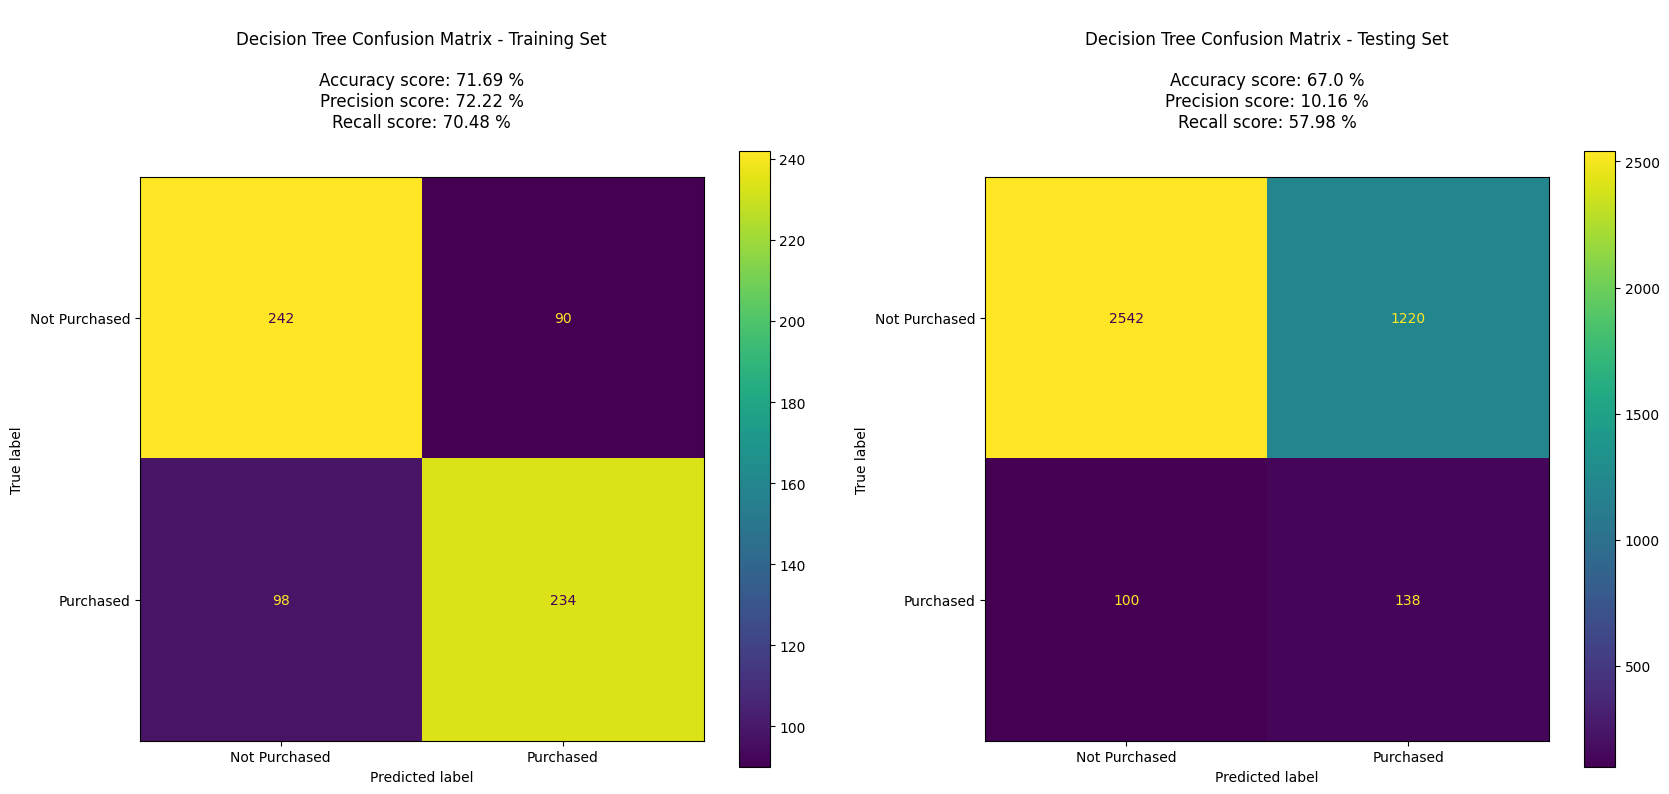

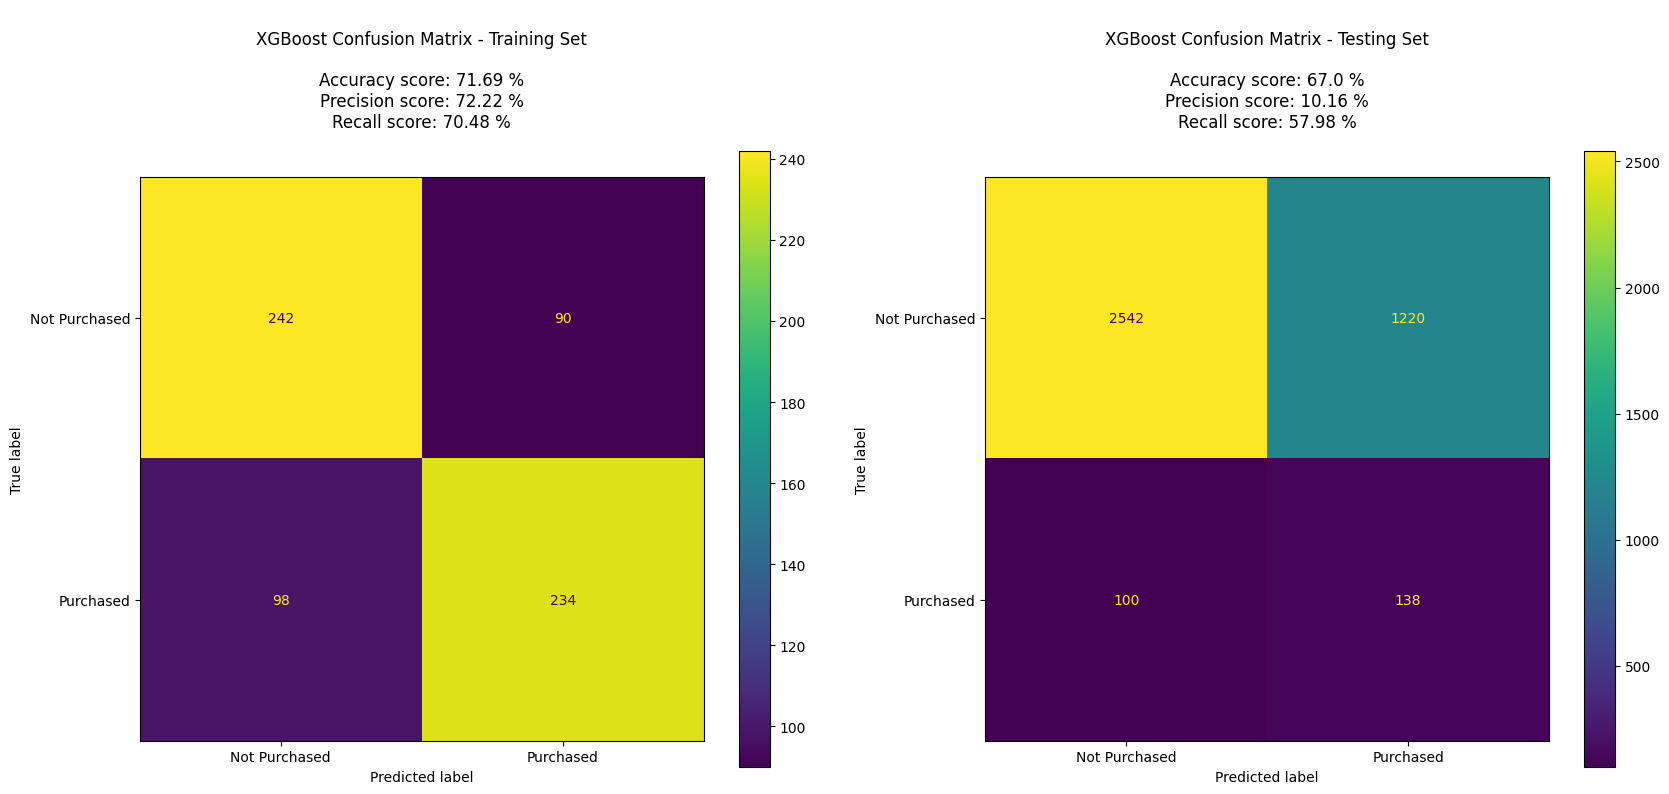

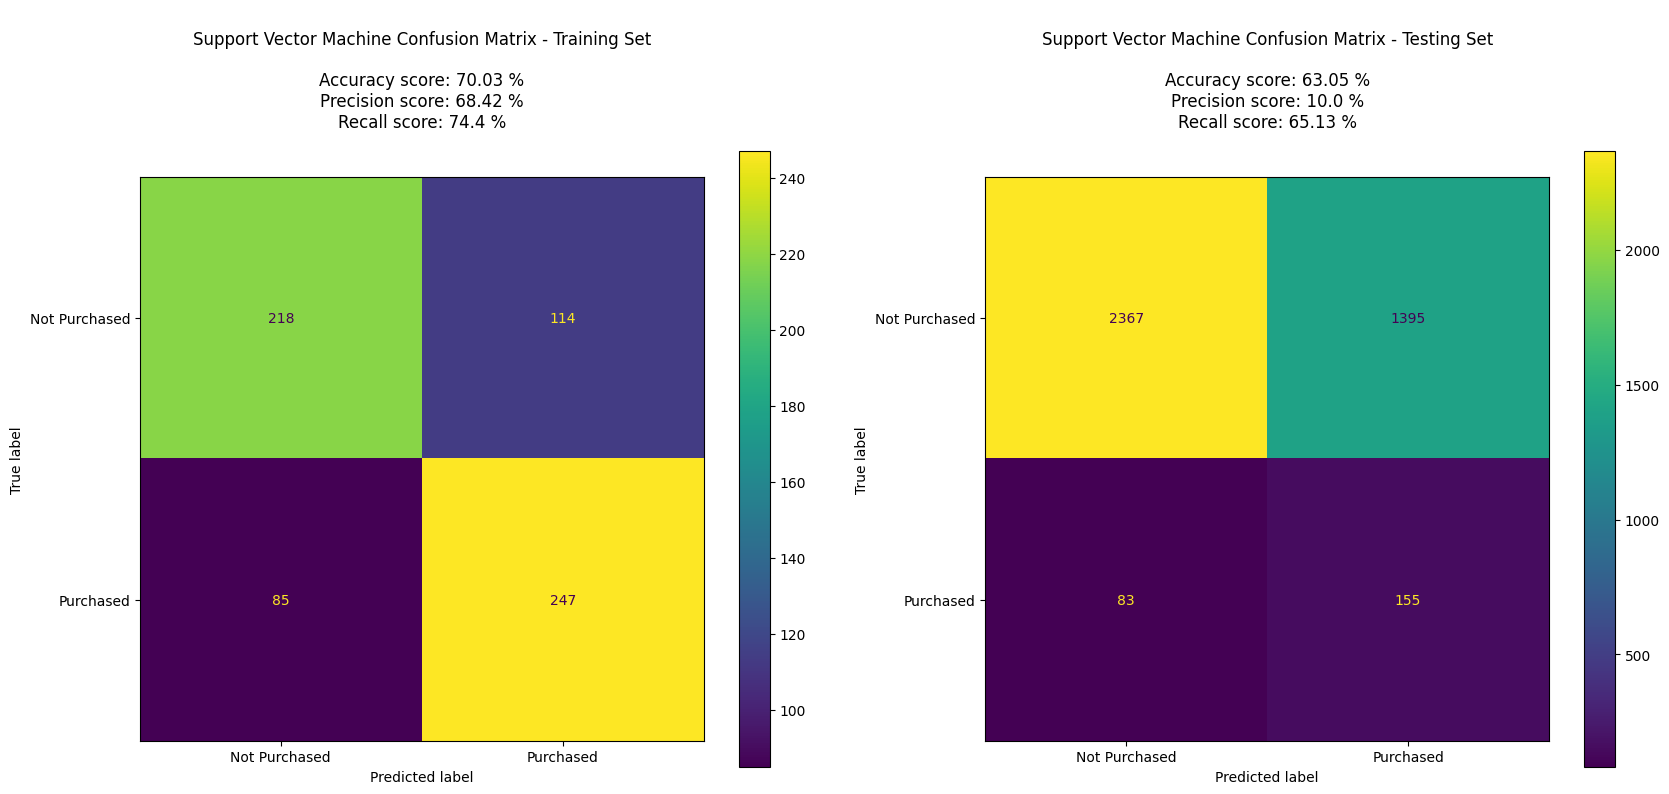

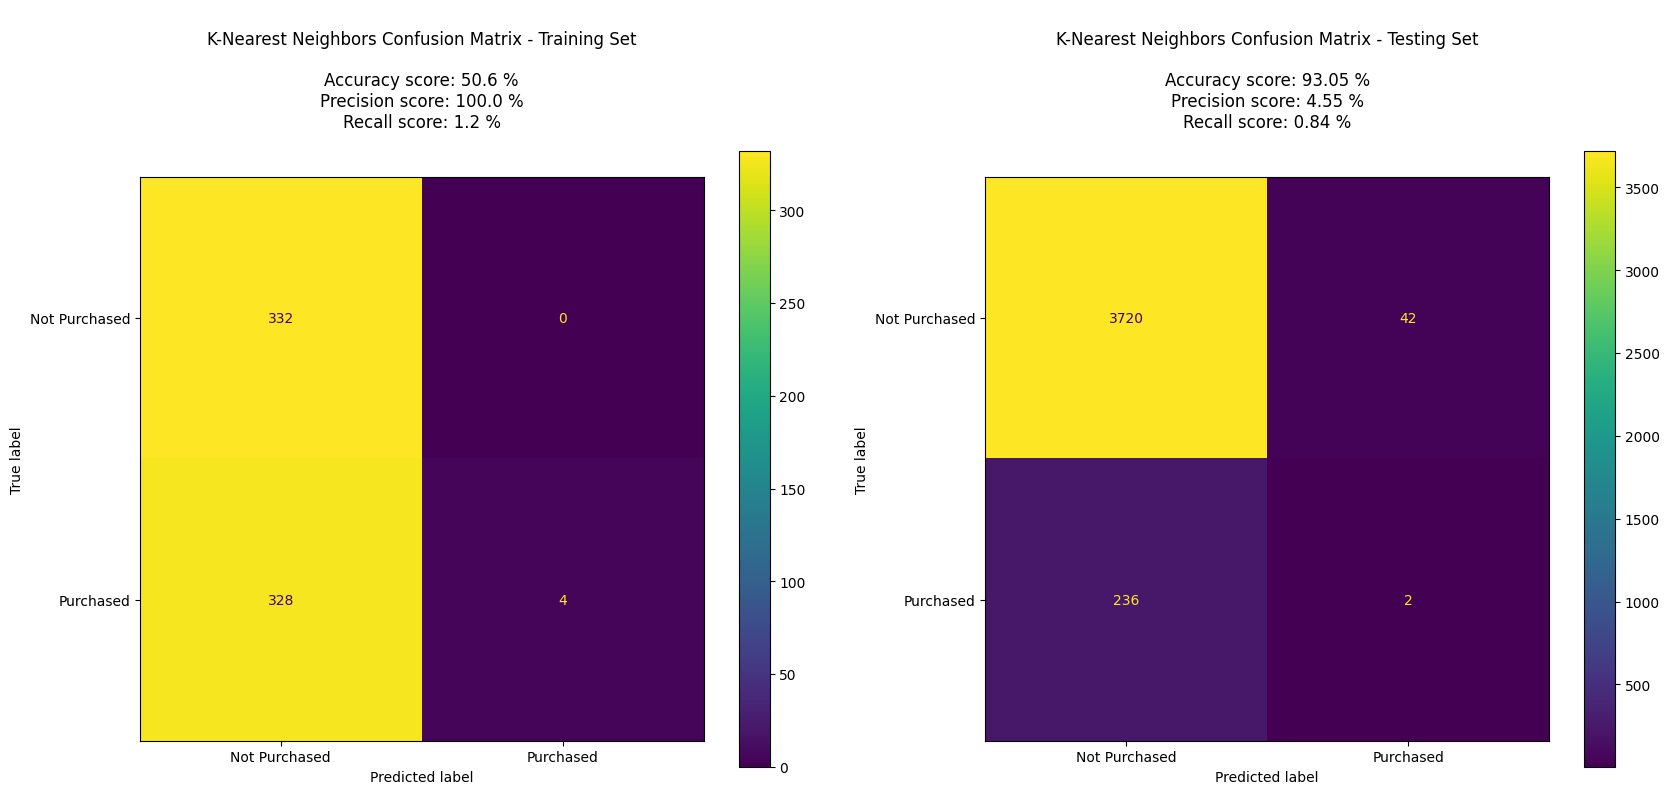

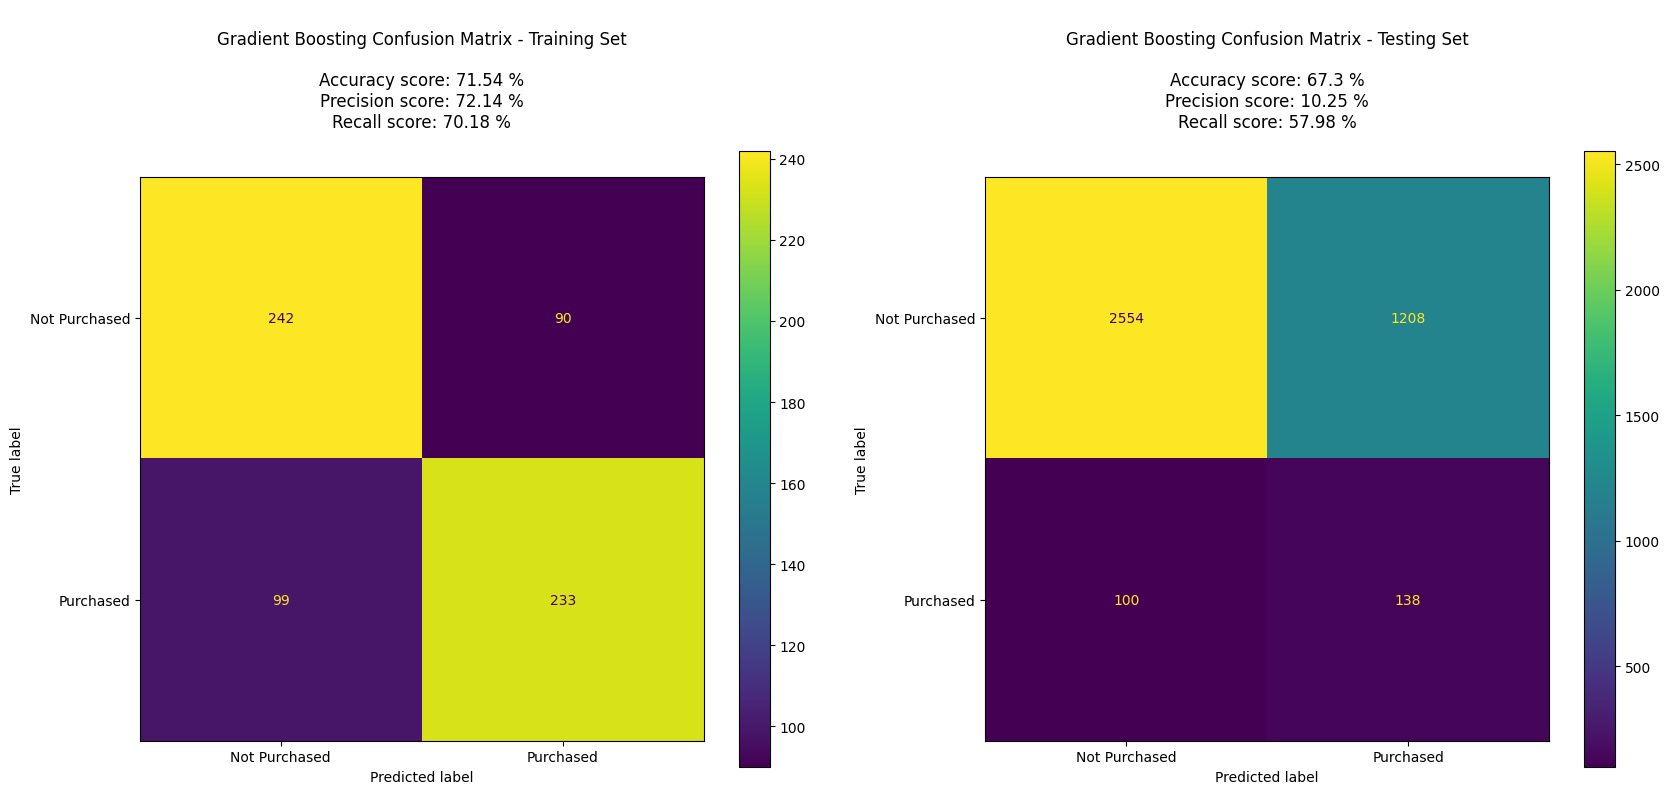

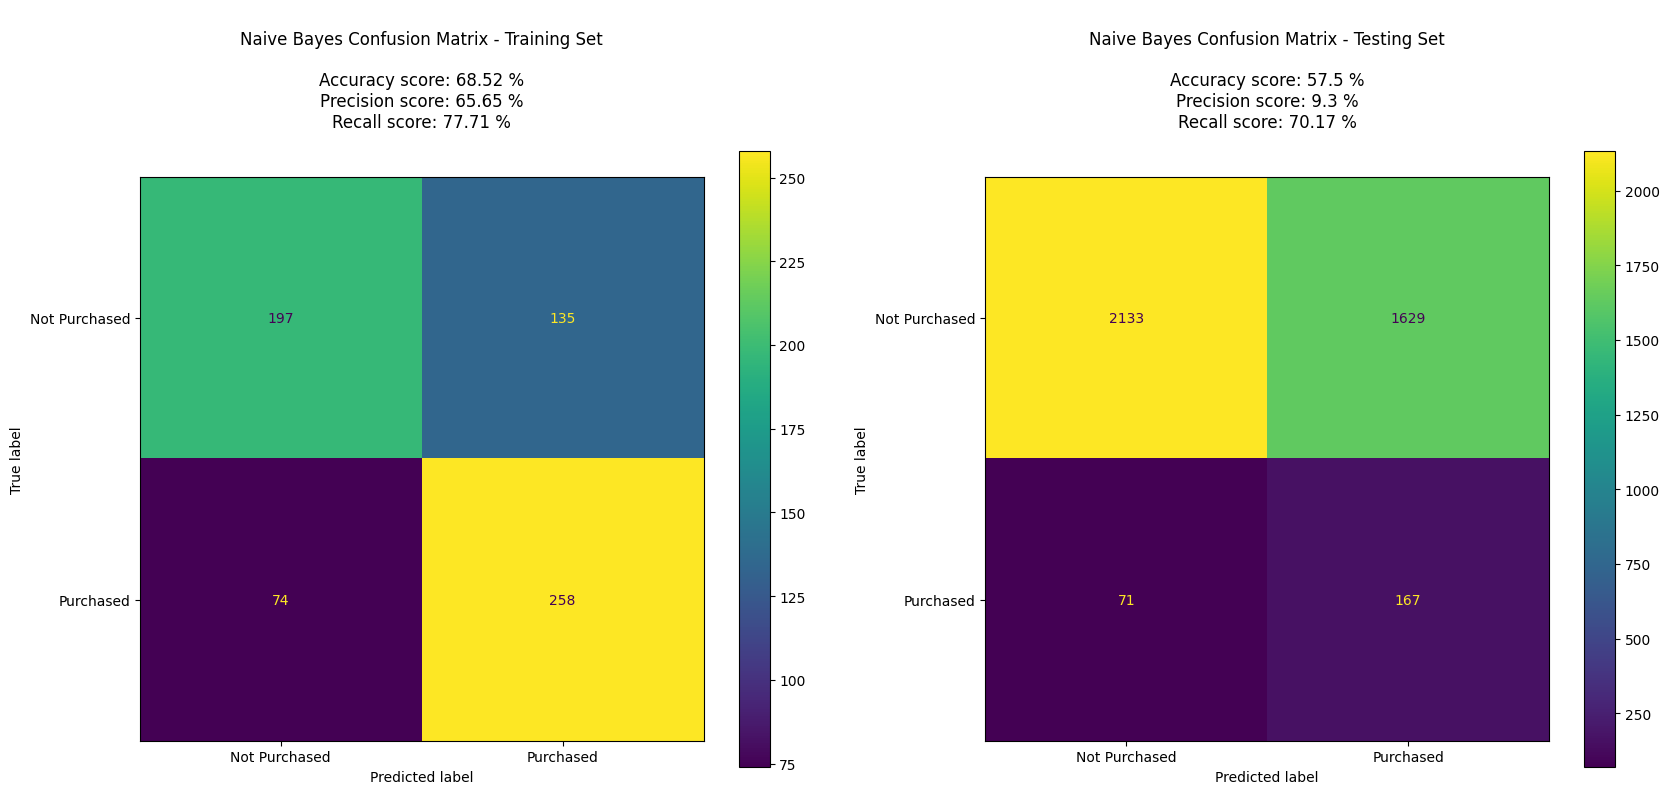

In [37]:
data = (X_train_rus, y_train_rus, X_test_rus, y_test)

lr = LogisticRegression(random_state=42)
lr.fit(data[0], data[1])
model_results = aggregate_model_results(f'Logistic Regression', data[0], data[1], data[2], data[3], model_results, lr)

rf = RandomForestClassifier(random_state=42)
rf.fit(data[0], data[1])
model_results = aggregate_model_results(f'Random Forest', data[0], data[1], data[2], data[3], model_results, rf)

dt = DecisionTreeClassifier(random_state=42)
dt.fit(data[0], data[1])
model_results = aggregate_model_results(f'Decision Tree', data[0], data[1], data[2], data[3], model_results, dt)

xgb = xgboost.XGBClassifier(random_state=42)
xgb.fit(data[0], data[1])
model_results = aggregate_model_results(f'XGBoost', data[0], data[1], data[2], data[3], model_results, xgb)

sv = svm.SVC(random_state=42)
sv.fit(data[0], data[1])
model_results = aggregate_model_results(f'Support Vector Machine', data[0], data[1], data[2], data[3], model_results, sv)

knn = KNeighborsClassifier()
knn.fit(data[0], data[1])
model_results = aggregate_model_results(f'K-Nearest Neighbors', data[0], data[1], data[2], data[3], model_results, knn)

gbm = GradientBoostingClassifier(random_state=42)
gbm.fit(data[0], data[1])
model_results = aggregate_model_results(f'Gradient Boosting', data[0], data[1], data[2], data[3], model_results, gbm)

nb = GaussianNB()
nb.fit(data[0], data[1])
model_results = aggregate_model_results(f'Naive Bayes', data[0], data[1], data[2], data[3], model_results, nb)


### Evaluation

In [38]:
results_test = model_results.drop(['Train Accuracy %', 'Train Precision %', 'Train Recall %',
                                   'Train True Positive', 'Train False Positive'], axis=1)

results_test.sort_values(by='Test Recall %', ascending=False).reset_index(drop=True)

Classifier  Test Accuracy %  Test Precision %  Test Recall %  \
0     Logistic Regression            57.80              9.36          70.17   
1             Naive Bayes            57.50              9.30          70.17   
2  Support Vector Machine            63.05             10.00          65.13   
3           Random Forest            67.00             10.16          57.98   
4           Decision Tree            67.00             10.16          57.98   
5                 XGBoost            67.00             10.16          57.98   
6       Gradient Boosting            67.30             10.25          57.98   
7     K-Nearest Neighbors            93.05              4.55           0.84   

   Test True Positive  Test False Positive  
0                 167                 1617  
1                 167                 1629  
2                 155                 1395  
3                 138                 1220  
4                 138                 1220  
5                 138                 1220  
6                 138                 1208  
7                   2                   42

Looking at table above, Logistic Regression and Gaussian Naive Bayes are really competitive, scoring the same recall score, but separated by a miniscule advantage of higher precision to the former model.

SVM, Random Forest, Decision Tree, XGBoost, and Gradient Boosting scored a better precision, but will much lesser recall.

On the other hand, KNN performed the worst of all the models. Despite having a high test accuracy, the performance could not be translated to detecting the Purchased instances. This is why, we cannot rely on the accuracy score for our evaluation.

Also, by aligning back to our main goal - to optimize the caravan insurance sales, it makes sense to select either Logistic Regression or Naive Bayes because they are able to predict the highest actual customers who are likely to purchase a caravan insurance. Though, other customers will receive false advertisement. Therefore, in order to select these two models, we will need to satisfy these assumptions:

    1. Firstly, the cost of advertising is low, via mobile app push or email notification. Thus, we can justify the 
       benefit against the low cost.
    2. Secondly, the customers who received the false advertisements (false positive) will ignore it and will not
       result in churn.

Alas, choosing which model to use depends on the business goal. In this case, we are choosing LR and NB to optimize and maximize the caravan insurance sales.

### Optimization

We are optimizing Logistic Regression and Naive Bayes models using Grid Search Cross-Validation with 5 folds.

#### Logistic Regression Fine-Tuning

In [39]:
def plot_precision_recall_tradeoff(clf, model_name, X_test, y_test):
    y_scores = clf.predict_proba(X_test)[:, 1]
    thresholds = np.linspace(0, 1, 101)
    thresholds = thresholds[:-1]
    precisions = []
    recalls = []

    for threshold in thresholds:
        y_pred = (y_scores > threshold).astype(int)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        precisions.append(precision)
        recalls.append(recall)

    default_threshold_idx = np.abs(thresholds - 0.5).argmin()
    default_threshold = thresholds[default_threshold_idx]
    default_precision = precisions[default_threshold_idx]
    default_recall = recalls[default_threshold_idx]
    
    y_pred = (y_scores > default_threshold).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    default_tp = tp
    default_fp = fp

    highest_precision = max(precisions)
    highest_precision_idx = np.where(precisions == highest_precision)[0][0]
    highest_precision_threshold = thresholds[highest_precision_idx]
    highest_precision_recall = recalls[highest_precision_idx]

    y_pred = (y_scores > highest_precision_threshold).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    highest_precision_tp = tp
    highest_precision_fp = fp

    highest_recall = max(recalls)
    highest_recall_idx = np.where(recalls == highest_recall)[0][0]
    highest_recall_threshold = thresholds[highest_recall_idx]
    highest_recall_precision = precisions[highest_recall_idx]

    y_pred = (y_scores > highest_recall_threshold).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    highest_recall_tp = tp
    highest_recall_fp = fp
    
    plt.figure(figsize=(12, 6))
    plt.plot(thresholds, precisions, label='Precision')
    plt.plot(thresholds, recalls, label='Recall')
    
    plt.axvline(x=default_threshold, color='gray', alpha=0.25, linestyle='--')  # Add threshold line
    plt.axvline(x=highest_precision_threshold, color='gray', alpha=0.25, linestyle='--')  # Add threshold line
    plt.axvline(x=highest_precision_recall, color='gray', alpha=0.25, linestyle='--')  # Add threshold line
    plt.axhline(y=default_precision, color='gray', alpha=0.25, linestyle='--')  # Add horizontal line at precision
    plt.axhline(y=default_recall, color='gray', alpha=0.25, linestyle='--')  # Add horizontal line at recall
    
    plt.text(0, 0.5, f'Default precision={default_precision:.4f}, recall={default_recall:.4f}\nTP={default_tp}, FP={default_fp} at threshold={default_threshold}', color='black')

    plt.axhline(y=highest_precision, color='gray', alpha=0.25, linestyle='--')  # Add horizontal line at precision
    plt.text(0, highest_precision + 0.04, f'Highest precision={highest_precision:.4f}, low recall={highest_precision_recall:.4f}\nTP={highest_precision_tp}, FP={highest_precision_fp} at threshold={highest_precision_threshold}', color='black')

    plt.axhline(y=highest_recall, color='gray', alpha=0.25, linestyle='--')  # Add horizontal line at precision
    plt.text(highest_recall - 0.7, highest_recall - 0.1, f'Highest recall={highest_recall:.4f}, low precision={highest_recall_precision:.4f}\nTP={highest_recall_tp}, FP={highest_recall_fp}  at threshold={highest_recall_threshold}', color='black')
    
    plt.xlabel('Threshold')
    plt.ylabel('Score')
    plt.title(f'{model_name} Precision and Recall Trade-off')
    plt.legend()
    plt.xticks(np.linspace(0, 1, 11))
    plt.show()

Best Hyperparameters: {'C': 0.1, 'class_weight': 'balanced', 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'max_iter': 100, 'penalty': 'l1', 'random_state': 42, 'solver': 'saga'}


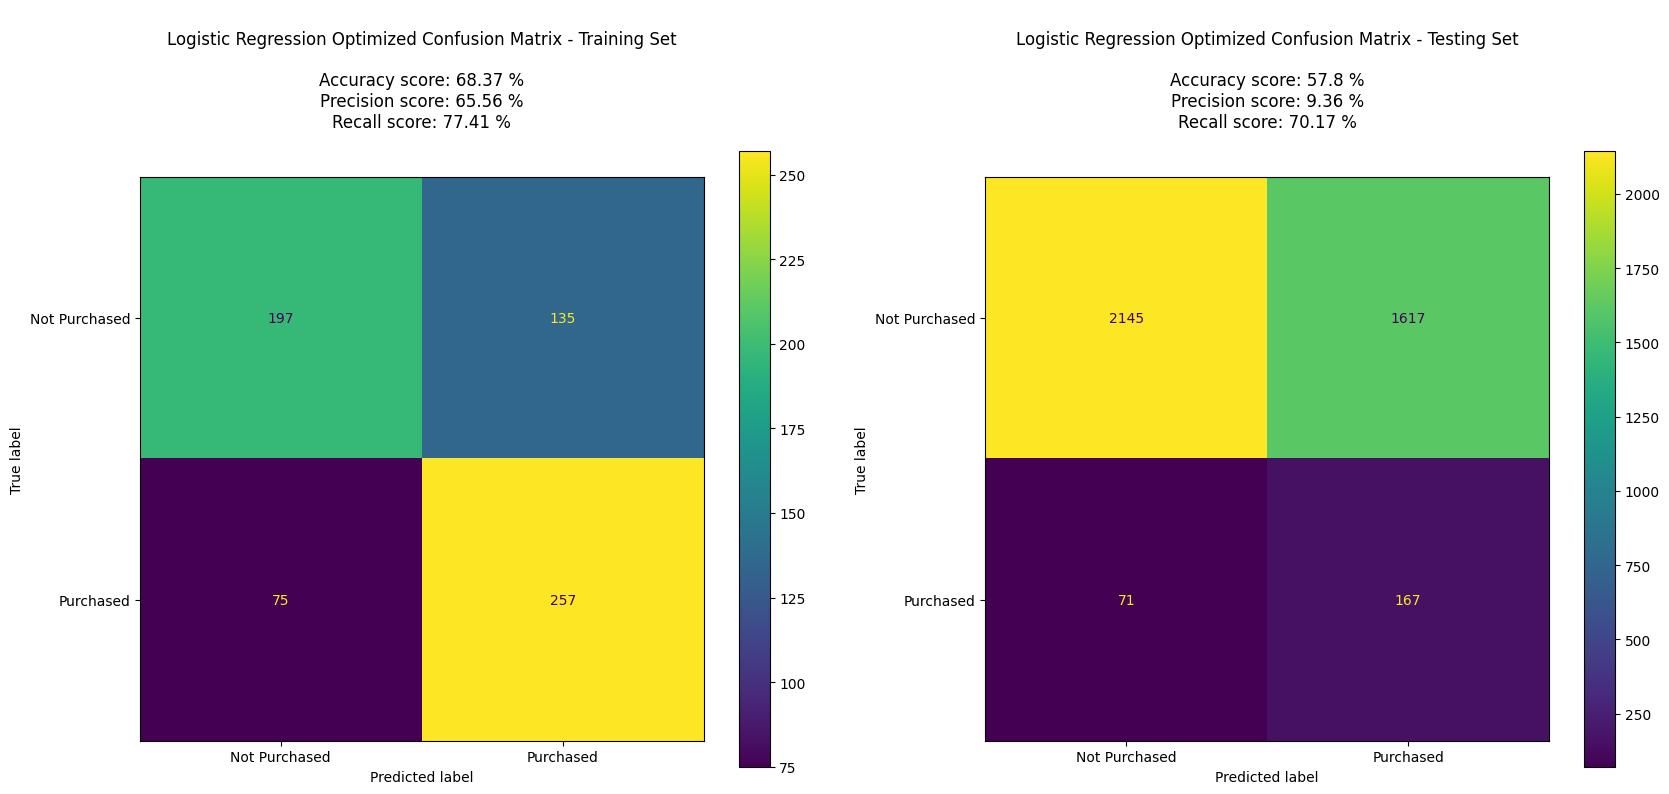

In [40]:
lr_model = LogisticRegression()

# Define the grid of hyperparameters to search
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],  # Regularization penalty
    'C': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0],  # Inverse of regularization strength
    'solver': ['newton-cg', 'lbfgs', 'sag', 'saga'],  # Algorithm to use in the optimization problem
    'max_iter': [100, 200, 300, 400, 500, 1000],  # Maximum number of iterations for optimization
    'dual': [True, False],  # Dual or primal formulation
    'fit_intercept': [True, False],  # Whether to calculate the intercept for this model
    'intercept_scaling': [1, 2, 3, 4],  # Useful only when the solver 'liblinear' is used and self.fit_intercept is set to True
    'class_weight': ['balanced', None],  # Weights associated with classes in the form {class_label: weight}
    'random_state': [42]  # The seed of the pseudo-random number generator to use when shuffling the data
}


# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=lr_model, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train_rus, y_train_rus)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the model with the best hyperparameters
best_lr_model = LogisticRegression(**best_params)
best_lr_model.fit(X_train_rus, y_train_rus)

model_results = aggregate_model_results(f'Logistic Regression Optimized', X_train_rus, y_train_rus, X_test_rus, y_test, model_results, best_lr_model)

The scores remained unchanged even after hyperparameters tuning. We will take this as the best model for Logistic Regression.

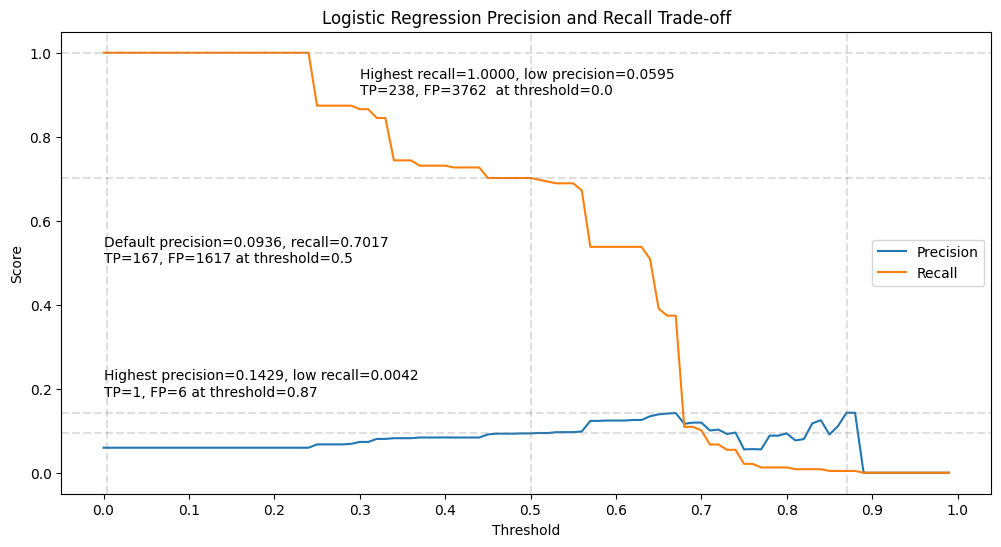

In [41]:
plot_precision_recall_tradeoff(best_lr_model, 'Logistic Regression', X_test_rus, y_test)

Based on the graph above, increasing the threshold of prediction probability would not increase the precision by much. If we want to maximize the sales, we can go with the lowest threshold, 0. However, basically all customers will receive the advertistment and not targeted enough. On the other hand, if we want to reduce the number of false advertisements as low as possible, we will compromise the sales to the targeted customers.

Therefore, the middle ground is the sweet spot and we can always adjust the threshold to suit any changes to the business goal.

#### Naive Bayes Fine-Tuning

Best Hyperparameters: {'var_smoothing': 1e-09}


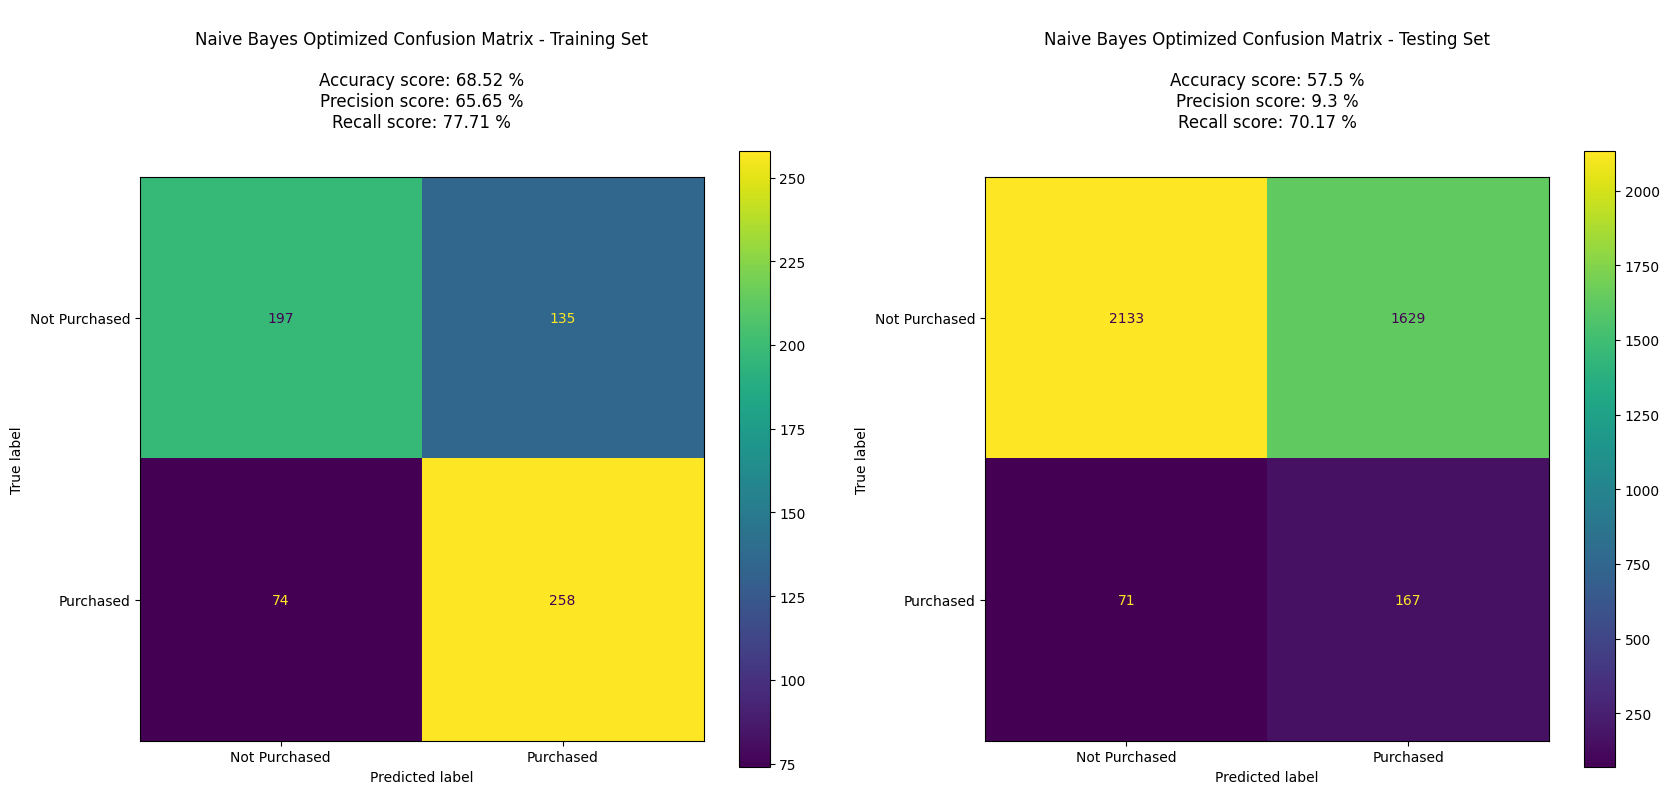

In [42]:
nb_model = GaussianNB()

# Define the grid of hyperparameters to search
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5],
}

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=nb_model, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train_rus, y_train_rus)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the model with the best hyperparameters
best_nb_model = GaussianNB(**best_params)
best_nb_model.fit(X_train_rus, y_train_rus)

model_results = aggregate_model_results(f'Naive Bayes Optimized', X_train_rus, y_train_rus, X_test_rus, y_test, model_results, best_nb_model)
    

The scores also remained as status quo. This is the best model for Naive Bayes.

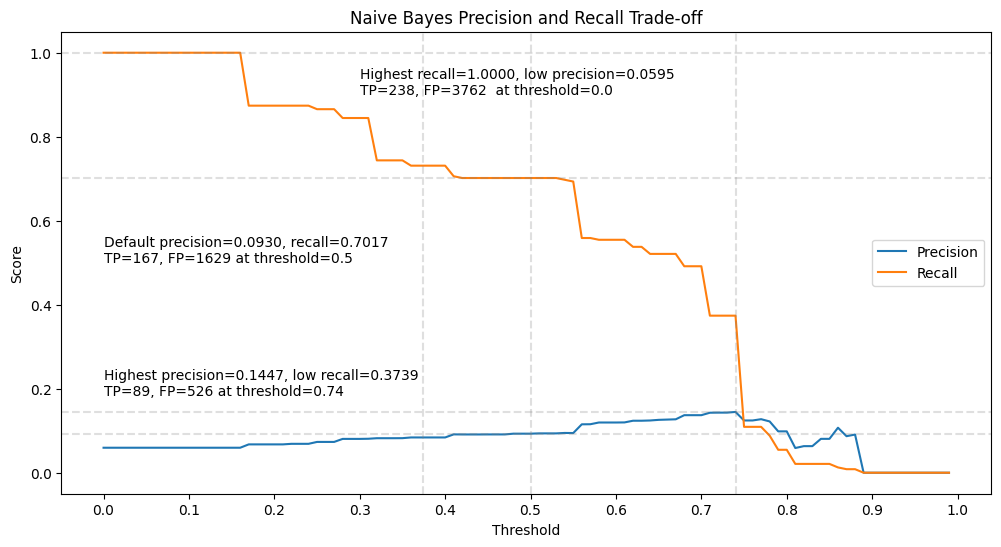

In [43]:
plot_precision_recall_tradeoff(best_nb_model, 'Naive Bayes', X_test_rus, y_test)

The graph might seem almost similar, but it has a distinct factor to select this as the best model for this problem.

The model is able to have a slightly better precision 14.47% compared to LR, 14.29% at a much higher recall, 37.39% as opposed to only 0.42%. This means, we are able to identify more customers to purchase the insurance, but still minimizing the false advertisements.

Then you asked, "How would this matters when we are choosing the mid threshold anyway?". Well, at least with choosing this model, we can have a leeway to select more broader tresholds, so we can have more options should there be any changes to the business goals.

**With that said, we are choosing the Naive Bayes model as the best model for this problem.**

In [44]:
results_test = model_results.drop(['Train Accuracy %', 'Train Precision %', 'Train Recall %',
                                   'Train True Positive', 'Train False Positive'], axis=1)

results_test.sort_values(by='Test Recall %', ascending=False).reset_index(drop=True)

Classifier  Test Accuracy %  Test Precision %  \
0            Logistic Regression            57.80              9.36   
1                    Naive Bayes            57.50              9.30   
2  Logistic Regression Optimized            57.80              9.36   
3          Naive Bayes Optimized            57.50              9.30   
4         Support Vector Machine            63.05             10.00   
5                  Random Forest            67.00             10.16   
6                  Decision Tree            67.00             10.16   
7                        XGBoost            67.00             10.16   
8              Gradient Boosting            67.30             10.25   
9            K-Nearest Neighbors            93.05              4.55   

   Test Recall %  Test True Positive  Test False Positive  
0          70.17                 167                 1617  
1          70.17                 167                 1629  
2          70.17                 167                 1617  
3          70.17                 167                 1629  
4          65.13                 155                 1395  
5          57.98                 138                 1220  
6          57.98                 138                 1220  
7          57.98                 138                 1220  
8          57.98                 138                 1208  
9           0.84                   2                   42

### Deployment

We are deploying the model using Gradio to receive the inputs from the user.

In [45]:
df.columns

Index(['CARAVAN', 'ORIGIN', 'MOSTYPE', 'MAANTHUI', 'MGEMOMV', 'MGEMLEEF',
       'MOSHOOFD', 'MGODRK', 'MGODPR', 'MGODOV', 'MGODGE', 'MRELGE', 'MRELSA',
       'MRELOV', 'MFALLEEN', 'MFGEKIND', 'MFWEKIND', 'MOPLHOOG', 'MOPLMIDD',
       'MOPLLAAG', 'MBERHOOG', 'MBERZELF', 'MBERBOER', 'MBERMIDD', 'MBERARBG',
       'MBERARBO', 'MSKA', 'MSKB1', 'MSKB2', 'MSKC', 'MSKD', 'MHHUUR',
       'MHKOOP', 'MAUT1', 'MAUT2', 'MAUT0', 'MZFONDS', 'MZPART', 'MINKM30',
       'MINK3045', 'MINK4575', 'MINK7512', 'MINK123M', 'MINKGEM', 'MKOOPKLA',
       'PWAPART', 'PWABEDR', 'PWALAND', 'PPERSAUT', 'PBESAUT', 'PMOTSCO',
       'PVRAAUT', 'PAANHANG', 'PTRACTOR', 'PWERKT', 'PBROM', 'PLEVEN',
       'PPERSONG', 'PGEZONG', 'PWAOREG', 'PBRAND', 'PZEILPL', 'PPLEZIER',
       'PFIETS', 'PINBOED', 'PBYSTAND', 'AWAPART', 'AWABEDR', 'AWALAND',
       'APERSAUT', 'ABESAUT', 'AMOTSCO', 'AVRAAUT', 'AAANHANG', 'ATRACTOR',
       'AWERKT', 'ABROM', 'ALEVEN', 'APERSONG', 'AGEZONG', 'AWAOREG', 'ABRAND',
       'AZEILPL', 

In [46]:
# Export the model to a pickle file
with open('clf_caravan.pkl','wb') as f:
    pickle.dump(best_nb_model,f)

In [48]:
# This is the result validation. CARAVAN_POL column is the actual values, whereby PREDICTED column is the predicted values.
# Contribution and number of policy columns are the original features, whereby CAR and FIRE columns are the cross-product values.
df_test_pred = pd.DataFrame(data=X_test_rus, columns=['PERSAUT', 'BRAND'])
df_test_pred['PREDICTED'] = best_lr_model.predict(X_test_rus)

df_validate = df[df['ORIGIN'] == 'test']
df_validate = df_validate[['CARAVAN', 'PPERSAUT', 'APERSAUT', 'PBRAND', 'ABRAND']]

df_validate.reset_index(drop=True, inplace=True)
df_test_pred.reset_index(drop=True, inplace=True)
df_validate = pd.concat([df_validate, df_test_pred], axis=1)

pred_col = df_validate['PREDICTED']
df_validate.drop(['PREDICTED'], axis=1, inplace=True)
df_validate.insert(1, 'PREDICTED', pred_col)
df_validate['PREDICTED'] = df_validate['PREDICTED'].replace(0.0, 'Not Purchased').replace(1.0, 'Purchased')
car_col = df_validate['PERSAUT']
df_validate.drop(['PERSAUT'], axis=1, inplace=True)
df_validate.insert(4, 'PERSAUT', car_col)
df_validate.head(5)

CARAVAN      PREDICTED  PPERSAUT  APERSAUT   PERSAUT  PBRAND  ABRAND  \
0        0  Not Purchased         0         0 -1.272144       4       1   
1        1      Purchased         6         1  0.778618       4       1   
2        0      Purchased         6         1  0.778618       4       1   
3        0      Purchased         5         1  0.019540       3       1   
4        0  Not Purchased         0         0 -1.272144       1       1   

      BRAND  
0  1.004965  
1  1.004965  
2  1.004965  
3  0.464060  
4 -0.278312

In [53]:
# Copy the scaler to generalize. We can always change the scaler to ROS, SMOTE, or SMOTETK if needed.
scaler = scaler_rus
encode_mapping = {'0':0, '1 – 49':1, '50 – 99':2, '100 – 199':3, '200 – 499':4, '500 – 999':5, '1000 – 4999':6, '5000 – 9999':7, '10,000 - 19,999':8, '>= 20,000':9}
values_list = list(encode_mapping.keys())

def make_prediction(Contrib_Car_Pol, No_Car_Pol, Contrib_Fire_Pol, No_Fire_Pol):
    try:
        with open('clf_caravan.pkl','rb') as f:

            Contrib_Car_Pol = encode_mapping[Contrib_Car_Pol]
            Contrib_Fire_Pol = encode_mapping[Contrib_Fire_Pol]
            clf=pickle.load(f)
            feature_columns = ['PPERSAUT', 'APERSAUT', 'PBRAND', 'ABRAND']
            df = pd.DataFrame(data=[[Contrib_Car_Pol, No_Car_Pol, Contrib_Fire_Pol, No_Fire_Pol]],
                            columns=feature_columns)
            column_pairs = [('PPERSAUT', 'APERSAUT'), ('PBRAND', 'ABRAND')]
            df = cross_product_features(df, column_pairs)
            df = handle_skewness(df, 'cbrt')
            X_new = scaler.transform(df.values)
            preds=clf.predict(X_new)
            if preds==0:
                return 'Will not purchase Caravan policy!'
            else:
                return 'Will purchase Caravan policy!'
    except Exception as e:
        return str(e)

In [54]:
# Non-GUI model prediction
make_prediction('1000 – 4999', 1, '200 – 499', 1)

'Will purchase Caravan policy!'

In [55]:
# Ask the user four inputs
Contrib_Car_Pol=gr.Dropdown(values_list, label='Car policy contribution:')
No_Car_Pol=gr.Number(label='Number of car policy:', minimum=0)
Contrib_Fire_Pol=gr.Dropdown(values_list, label='Fire policy contribution:')
No_Fire_Pol=gr.Number(label='Number of fire policy:', minimum=0)

inputs = [Contrib_Car_Pol, No_Car_Pol, Contrib_Fire_Pol, No_Fire_Pol]
output=gr.Textbox()

In [56]:
# Launch and display the Gradio interface
app=gr.Interface(fn=make_prediction,inputs=inputs,outputs=output)
app.launch(share=True)

Running on local URL:  http://127.0.0.1:7861
Running on public URL: https://dd98e910fef2ca4aee.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


### Future Improvements

We believe there are still room for improvements in certain areas including:

    1. Choosing the features using PCA algorithm instead of Random Forest features selection.
    2. Applying boosting to reduce errors in prediction.
    3. Applying neural network algorithm. It is not definitive that it will result in a better score, but it will be 
       interesting approach.